<br>
<br>
<br>
<br>

# 위치데이터와 앱 데이터 EDA

---

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [2]:
# 한글 폰트 사용

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


In [3]:
# 위치데이터와 앱 사용 데이터

sample_Location = pd.read_table('Bigdata_2_sample_Location.txt', error_bad_lines=False)
sample_AppUsage_usage_app_list = pd.read_table('Bigdata_3_sample_AppUsage_usage_app_list.txt', error_bad_lines=False)
sample_AppUsage_usage_sum_time = pd.read_table('Bigdata_3_sample_AppUsage_usage_sum_time.txt', error_bad_lines=False, encoding='cp949')

# 설문 데이터

PS_Question_1 = pd.read_csv('PS_Question_1.csv', encoding='cp949')
PS_Question_2 = pd.read_csv('PS_Question_2.csv', encoding='cp949')
PS_mobile = pd.read_csv('PS_mobile.csv', encoding='cp949')
PS_job = pd.read_csv('PS_job.csv', encoding='cp949')
PS_home = pd.read_csv('PS_home.csv', encoding='cp949')
PS_family = pd.read_csv('PS_family.csv', encoding='cp949')

b'Skipping line 1095006: expected 21 fields, saw 22\nSkipping line 1095049: expected 21 fields, saw 22\nSkipping line 1096034: expected 21 fields, saw 22\n'
b'Skipping line 1140315: expected 21 fields, saw 22\n'
b'Skipping line 1234278: expected 21 fields, saw 22\nSkipping line 1236082: expected 21 fields, saw 22\nSkipping line 1238545: expected 21 fields, saw 22\nSkipping line 1238702: expected 21 fields, saw 22\nSkipping line 1238915: expected 21 fields, saw 22\nSkipping line 1242722: expected 21 fields, saw 22\n'
b'Skipping line 1256857: expected 21 fields, saw 22\nSkipping line 1256897: expected 21 fields, saw 22\nSkipping line 1256931: expected 21 fields, saw 22\nSkipping line 1257047: expected 21 fields, saw 22\nSkipping line 1257330: expected 21 fields, saw 22\nSkipping line 1257389: expected 21 fields, saw 22\nSkipping line 1257406: expected 21 fields, saw 22\n'
b'Skipping line 1350974: expected 21 fields, saw 22\n'
b'Skipping line 1450488: expected 21 fields, saw 22\nSkipping 

b'Skipping line 19664155: expected 8 fields, saw 9\n'
b'Skipping line 25067048: expected 8 fields, saw 9\nSkipping line 25067220: expected 8 fields, saw 9\nSkipping line 25067390: expected 8 fields, saw 9\nSkipping line 25067560: expected 8 fields, saw 9\nSkipping line 25067730: expected 8 fields, saw 9\nSkipping line 25067900: expected 8 fields, saw 9\nSkipping line 25068071: expected 8 fields, saw 9\n'
b'Skipping line 28225246: expected 8 fields, saw 9\nSkipping line 28225424: expected 8 fields, saw 9\nSkipping line 28225608: expected 8 fields, saw 9\nSkipping line 28225793: expected 8 fields, saw 9\nSkipping line 28225975: expected 8 fields, saw 9\nSkipping line 28226157: expected 8 fields, saw 9\nSkipping line 28226337: expected 8 fields, saw 9\nSkipping line 28226518: expected 8 fields, saw 9\nSkipping line 28226698: expected 8 fields, saw 9\nSkipping line 28226879: expected 8 fields, saw 9\nSkipping line 28227066: expected 8 fields, saw 9\nSkipping line 28227259: expected 8 field

<br>
<br>
<br>
<br>

# sample_Location

<br>
null값이 적은 컬럼에 한하여 EDA 진행

---

In [4]:
sample_Location.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2017-09-06 09:02:05.000,I0274841,하나투어,Near,Travel Agency,서울특별시 강남구 역삼1동,16.0,37.491819,127.031087,70183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2017-09-06 16:40:57.000,P0053069,우리은행,Near,Bank,서울 동작구 노량진동 42-11,1.0,37.513165,126.937856,29984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 3,641,462개의 row

len(sample_Location)

3641462

In [6]:
# 총 18463명의 패널 데이터가 존재

sample_Location['pid'].nunique()

18463

In [8]:
# 각 컬럼별 결측치 비율 확인
# 약 15%의 데이터는 아예 장소에 대한 정보가 없음
# 결측치가 50% 이상인 데이터에 대해서는 EDA를 진행하지 않음

sample_Location.isnull().sum() / len(sample_Location)

idx               0.000000
time              0.000000
pid               0.000000
placename         0.144341
in_near           0.144340
category          0.144340
address           0.166221
floor             0.156821
lat               0.152289
lng               0.152289
loplat_id         0.152284
place_tag         0.629312
zipcode           0.541312
area_name         0.697613
area_tag          0.697613
complex_name      0.977762
complex_branch    0.980798
area_id           0.697613
area_lat          0.697613
area_lng          0.697613
complex_id        0.972911
dtype: float64

In [9]:
# placename, in_near, category가 동시에 없는 데이터가 약 15%라는 것을 확인   
# 결국 저 셋에서는 동시에 결측치가 발생한게 맞음

len(sample_Location[lambda x: x.placename.isnull()][lambda x: x.in_near.isnull()][lambda x: x.category.isnull()]) / len(sample_Location)

0.14434010295864683

In [10]:
# placename, in_near, category에 결측치가 존재하는 데이터를 지움

sample_Location = sample_Location.dropna(thresh=11)

In [11]:
# 대부분의 불필요한 결측치 제거

sample_Location.isnull().sum()

idx                     0
time                    0
pid                     0
placename               2
in_near                 0
category                0
address             40787
floor                 573
lat                     0
lng                     0
loplat_id               0
place_tag         1736734
zipcode           1380996
area_name         2475770
area_tag          2475770
complex_name      2970313
complex_branch    2981367
area_id           2475770
area_lat          2475770
area_lng          2475770
complex_id        2952650
dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
<br>
## 위치데이터 1줄로 정리

In [12]:
sample_Location.head(2)

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 실제 사용할 위치데이터는 Near, 즉 근처에만 간 데이터를 모두 지움
# 사용할 컬럼 중 address, floor에 결측치가 있으므로 조정 필요

sample_Location_in = sample_Location[lambda x: x.in_near == 'In']
sample_Location_in = sample_Location_in[lambda x: x.placename.notnull()]

In [32]:
sample_Location_in.isnull().sum()

idx                     0
time                    0
pid                     0
placename               0
in_near                 0
category                0
address             17585
floor                 573
lat                     0
lng                     0
loplat_id               0
place_tag          674543
zipcode            546738
area_name         1016243
area_tag          1016243
complex_name      1175500
complex_branch    1186554
area_id           1016243
area_lat          1016243
area_lng          1016243
complex_id        1157837
dtype: int64

In [33]:
# target 목록 뽑아내기



# 일단 데이터 크기를 줄이고자 사용시간이 0이거나 Null인 앱 사용기록을 모두 지움
# 사용시간이 0이거나 Null인 앱 사용기록은 따로 usage_sum_time_zero로 저장

usage_sum_time_notzero = sample_AppUsage_usage_sum_time[lambda x: x.total_time != '0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time != '00:00:00' ]
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time !=  '0:0:0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time.notnull()]

sample_AppUsage_usage_sum_time['total_time'] = sample_AppUsage_usage_sum_time['total_time'].fillna('None')
sample_AppUsage_usage_sum_time['usage_zero'] = sample_AppUsage_usage_sum_time['total_time'].map(lambda x: 1 if x in [
    '0','00:00:00','0:0:0','None'] else 0)
usage_sum_time_zero = sample_AppUsage_usage_sum_time[lambda x: x.usage_zero == 1]

# app_name 결측치, panel_id 이상한거 처리하기

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.app_name.notnull()]

panel_id_list = list(sample_AppUsage_usage_app_list['panel_id'].unique())
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.panel_id.isin(panel_id_list)]

# 데이터 측정일시를 timestamp 객체로 바꾸고 사용시간 정리
# 사용시간이 음수인 데이터 제거 (총 62개의 row)

usage_sum_time_notzero['reg_date'] = usage_sum_time_notzero['reg_date'].map(
    lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

usage_sum_time_notzero['total_time_hour'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[0]))
usage_sum_time_notzero['total_time_minute'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[1]))
usage_sum_time_notzero['total_time_second'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[2]))
usage_sum_time_notzero['total_usage_time'] = round(
    usage_sum_time_notzero['total_time_hour']*60 
    + usage_sum_time_notzero['total_time_minute'] 
    + usage_sum_time_notzero['total_time_second']/60 , 1)

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_usage_time >= 0]

usage_sum_time_notzero['reg_cnt'] = usage_sum_time_notzero['reg_cnt'].map(lambda x: int(x))

target_user = usage_sum_time_notzero[lambda x: 32< x.reg_cnt].groupby('panel_id')['reg_cnt'].nunique().reset_index()
target_user = target_user[lambda x: x.reg_cnt == 10]

reg_cnt_reg_date = usage_sum_time_notzero.groupby('reg_cnt')['reg_date'].unique().reset_index()
reg_cnt_reg_date['reg_date'] = reg_cnt_reg_date['reg_date'].map(lambda x: min(x))

In [34]:
# 앱데이터 타겟이 되는 패널에 대한 데이터만 추출

Location_target = sample_Location_in.merge(target_user, how='left', left_on='pid', right_on='panel_id' )
Location_target = Location_target[lambda x: x.reg_cnt.notnull()]

In [36]:
# 하루에 여러번 찍힌 장소데이터는 한번 간것으로 간주

Location_target['time'] = Location_target['time'].map(lambda x: str(x)[:10])
Location_target = Location_target.drop_duplicates(subset=['pid','time','placename'])

In [37]:
# 2018년 4월 30일 이후의 위치데이터만을 사용

Location_target['time'] = Location_target['time'].map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
target_start_date = datetime.datetime.strptime('2018-04-30','%Y-%m-%d')
Location_target = Location_target[lambda x: x.time >= target_start_date]

In [38]:
# 타겟 패널 중 1076명은 위치데이터가 없음

len(target_user) - Location_target['pid'].nunique()

1076

In [64]:
# 타겟 패널의 3% 이상이 방문한 장소를 컬럼으로!

target_freq_placename = Location_target.drop_duplicates(
    subset=['pid','placename'])['placename'].value_counts().reset_index()[lambda x: x.placename >= 300]

target_freq_placename.columns = ['placename', 'count_num']
target_freq_placename = target_freq_placename[lambda x: x.placename != '비식품'][lambda x: x.placename != '식품'][lambda x: x.placename != '식품/비식품'].reset_index(drop=True)

freq_placename = Location_target.merge(target_freq_placename, how='left', on='placename')[lambda x: x.count_num.notnull()]
freq_placename_matrix = freq_placename[['pid','placename']].groupby(
    ['pid'])['placename'].value_counts().unstack().reset_index()

freq_placename_matrix = freq_placename_matrix.fillna(0)
del freq_placename_matrix.columns.name

In [71]:
freq_placename_matrix.head()

,pid,CU,GS25,KFC,THE FACE SHOP,UNIQLO,다이소,던킨도너츠,뚜레쥬르,롯데리아,맘스터치,매표소/로비/휴게소,맥도날드,배스킨라빈스,버거킹,분당선,빽다방,서울5호선,설빙,세븐일레븐,스타벅스,엔제리너스,올리브영,이디야,투썸플레이스,파리바게뜨,푸드코트,할리스커피
0,A0002542,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A0003204,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,A0003768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,A0008228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 1번 : placename

freq_placename = pd.DataFrame(sample_Location_in.groupby('pid')['placename'].value_counts())
freq_placename.columns = ['count']
freq_placename = freq_placename.reset_index()

freq_placename_list = pd.DataFrame(freq_placename.groupby('pid')['placename'].unique())
freq_placename_list['freq_place_1'] = freq_placename_list['placename'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_placename_list['freq_place_2'] = freq_placename_list['placename'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_placename_list['freq_place_3'] = freq_placename_list['placename'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_placename_list['freq_place_4'] = freq_placename_list['placename'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_placename_list['freq_place_5'] = freq_placename_list['placename'].map(lambda x: x[4] if len(x) >= 5 else 'None' )
freq_placename_list['freq_place_6'] = freq_placename_list['placename'].map(lambda x: x[5] if len(x) >= 6 else 'None' )
freq_placename_list['freq_place_7'] = freq_placename_list['placename'].map(lambda x: x[6] if len(x) >= 7 else 'None' )
freq_placename_list['freq_place_8'] = freq_placename_list['placename'].map(lambda x: x[7] if len(x) >= 8 else 'None' )
freq_placename_list['freq_place_9'] = freq_placename_list['placename'].map(lambda x: x[8] if len(x) >= 9 else 'None' )
freq_placename_list['freq_place_10'] = freq_placename_list['placename'].map(lambda x: x[9] if len(x) >= 10 else 'None' )

grouped = freq_placename.groupby('pid')
indexcol = list(freq_placename['pid'].unique())
countlist = []
for i,pid in enumerate(indexcol) :
    if i%1000 == 0:
        print(i)
    counted = grouped.get_group(pid)['count'].tolist()
    countlist.append(counted)

freq_placename_list['placename_freq'] = countlist
freq_placename_list['freq_place_count_1'] = freq_placename_list['placename_freq'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_placename_list['freq_place_count_2'] = freq_placename_list['placename_freq'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_placename_list['freq_place_count_3'] = freq_placename_list['placename_freq'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_placename_list['freq_place_count_4'] = freq_placename_list['placename_freq'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_placename_list['freq_place_count_5'] = freq_placename_list['placename_freq'].map(lambda x: x[4] if len(x) >= 5 else 'None' )
freq_placename_list['freq_place_count_6'] = freq_placename_list['placename_freq'].map(lambda x: x[5] if len(x) >= 6 else 'None' )
freq_placename_list['freq_place_count_7'] = freq_placename_list['placename_freq'].map(lambda x: x[6] if len(x) >= 7 else 'None' )
freq_placename_list['freq_place_count_8'] = freq_placename_list['placename_freq'].map(lambda x: x[7] if len(x) >= 8 else 'None' )
freq_placename_list['freq_place_count_9'] = freq_placename_list['placename_freq'].map(lambda x: x[8] if len(x) >= 9 else 'None' )
freq_placename_list['freq_place_count_10'] = freq_placename_list['placename_freq'].map(lambda x: x[9] if len(x) >= 10 else 'None' )

freq_placename_list = freq_placename_list.reset_index()


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [22]:
freq_placename_list.head(1)

,pid,placename,freq_place_1,freq_place_2,freq_place_3,freq_place_4,freq_place_5,freq_place_6,freq_place_7,freq_place_8,freq_place_9,freq_place_10,placename_freq,freq_place_count_1,freq_place_count_2,freq_place_count_3,freq_place_count_4,freq_place_count_5,freq_place_count_6,freq_place_count_7,freq_place_count_8,freq_place_count_9,freq_place_count_10
0,A0000910,"[빅마켓 신영통점, 서울2호선, 식품, 서울1호선, 서울4호선 인덕원역, 킹스할인마...",빅마켓 신영통점,서울2호선,식품,서울1호선,서울4호선 인덕원역,킹스할인마트,ASHLEY,계절밥상,비식품,빅마켓 신영통점/쿨펫동물병원,"[4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]",4,4,4,2,2,2,1,1,1,1


In [16]:
# 2번 : category

freq_category = pd.DataFrame(sample_Location_in.groupby('pid')['category'].value_counts())
freq_category.columns = ['count']
freq_category = freq_category.reset_index()

freq_category_list = pd.DataFrame(freq_category.groupby('pid')['category'].unique())
freq_category_list['freq_cat_1'] = freq_category_list['category'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_category_list['freq_cat_2'] = freq_category_list['category'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_category_list['freq_cat_3'] = freq_category_list['category'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_category_list['freq_cat_4'] = freq_category_list['category'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_category_list['freq_cat_5'] = freq_category_list['category'].map(lambda x: x[4] if len(x) >= 5 else 'None' )
freq_category_list['freq_cat_6'] = freq_category_list['category'].map(lambda x: x[5] if len(x) >= 6 else 'None' )
freq_category_list['freq_cat_7'] = freq_category_list['category'].map(lambda x: x[6] if len(x) >= 7 else 'None' )
freq_category_list['freq_cat_8'] = freq_category_list['category'].map(lambda x: x[7] if len(x) >= 8 else 'None' )
freq_category_list['freq_cat_9'] = freq_category_list['category'].map(lambda x: x[8] if len(x) >= 9 else 'None' )
freq_category_list['freq_cat_10'] = freq_category_list['category'].map(lambda x: x[9] if len(x) >= 10 else 'None' )

grouped = freq_category.groupby('pid')
indexcol = list(freq_category['pid'].unique())
countlist = []
for i,pid in enumerate(indexcol) :
    if i%1000 == 0:
        print(i)
    counted = grouped.get_group(pid)['count'].tolist()
    countlist.append(counted)

freq_category_list['category_freq'] = countlist
freq_category_list['freq_cat_count_1'] = freq_category_list['category_freq'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_category_list['freq_cat_count_2'] = freq_category_list['category_freq'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_category_list['freq_cat_count_3'] = freq_category_list['category_freq'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_category_list['freq_cat_count_4'] = freq_category_list['category_freq'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_category_list['freq_cat_count_5'] = freq_category_list['category_freq'].map(lambda x: x[4] if len(x) >= 5 else 'None' )
freq_category_list['freq_cat_count_6'] = freq_category_list['category_freq'].map(lambda x: x[5] if len(x) >= 6 else 'None' )
freq_category_list['freq_cat_count_7'] = freq_category_list['category_freq'].map(lambda x: x[6] if len(x) >= 7 else 'None' )
freq_category_list['freq_cat_count_8'] = freq_category_list['category_freq'].map(lambda x: x[7] if len(x) >= 8 else 'None' )
freq_category_list['freq_cat_count_9'] = freq_category_list['category_freq'].map(lambda x: x[8] if len(x) >= 9 else 'None' )
freq_category_list['freq_cat_count_10'] = freq_category_list['category_freq'].map(lambda x: x[9] if len(x) >= 10 else 'None' )

freq_category_list = freq_category_list.reset_index()


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [17]:
freq_category_list.head(1)

,pid,category,freq_cat_1,freq_cat_2,freq_cat_3,freq_cat_4,freq_cat_5,freq_cat_6,freq_cat_7,freq_cat_8,freq_cat_9,freq_cat_10,category_freq,freq_cat_count_1,freq_cat_count_2,freq_cat_count_3,freq_cat_count_4,freq_cat_count_5,freq_cat_count_6,freq_cat_count_7,freq_cat_count_8,freq_cat_count_9,freq_cat_count_10
0,A0000910,"[Discount Department Store, Subway Train, Subw...",Discount Department Store,Subway Train,Subway Station,Supermarket,Coffee Shop,Korean Food Restaurants,Post Office,Veterinary Clinic,Western Food Restaurants,None,"[10, 6, 3, 3, 1, 1, 1, 1, 1]",10,6,3,3,1,1,1,1,1,None


In [18]:
# 3번 : category matrix

freq_category = pd.DataFrame(sample_Location_in.groupby('pid')['category'].value_counts())
freq_category_matrix = freq_category.unstack()
freq_category_matrix = freq_category_matrix.fillna(0).reset_index()
freq_category_matrix.columns = freq_category_matrix.columns.droplevel(level=0)

freq_category_matrix.head()

category,,Accounting/Tax Consultancy,Acting Academy,Airport,Amusement Arcade,Antique Shop,Aquarium,Auto Repair Shop,Automobile Parts,Automotive Shop,Bakery,Bank,Bar,Baseball Batting Cage,Beauty Shop,Billiard,Book Rental Shop,Bookstore,Buddhismm Temple,Burger/Sandwich,Bus Terminal,Cabaret,Cafeteria,Casino,Catholic Church,Chicken,Child Daycare Center,Children Product,Chinese Food Restaurants,Chiropractic Care/Acupuncture,Cigarette,City Hall,Civil Service Examination Institute,Claw Machine Arcade,Clothing Accessory Store,Clothing Store,Club,Coffee Shop,Comic Book Caf?,Comic Book Cafe,Comic Book Café,Community Center,Community College,Congress,Convenience Store,Cosmetics Shop,Court/Prosecutor office,Dancing Academy,Dental Clinic,Department Store,Dermatology Clinic,Discount Department Store,Driving School,Drug Store,Duty-free Shop,Electronics Repair,Electronics Shop,Elementary School,Event,Fine Arts Education,Fire Station,Flower Shop,Football Academy,Foreign Language institute,Funeral Hall,Furniture Shop,Gallery,Game/Doll/Toy Store,Game/Toy Store,Gas stations,General Educational Institute,General Hospital,Go Academy,Golf Course,Golf Driving Range,Grand Theater,Grocery Store,Hair Salon,Health Additive Food Store,High school,Historic Site,Home Improvement Service/Plumber,Household Goods,Icecream Shop,Indoor Sports Complex,Insurance,Interior Decoration,Internal Medicine Clinic,Izakaya,Japanese Food Restaurants,Jewellery Accessory Store,Jewellery Shop,Juice Shop,Karaoke,Kids Cafe,Kids Clothing Store,Kindergarten,Korean Food Restaurants,Leather Product Store,Legal service,Library,Martial Arts Academy,Massage Salon,Medical Goods Store,Medicinal Herb Store,Middle School,Midwifery Service Center,Mobile Phone Repair,Mobile Phone Shop,Moneylending Business,Motorcycle Shop,Movie Theater,Multimedia Caf?,Multimedia Cafe,Multimedia Café,Museum,Music Education,Near,Neurology Clinic,Neurosurgery,Obstetrics/Gynaecology Clinic,Office,Ophthalmic Clinic,Optical Store,Oriental Medical Clinic,Orthopedics,Others,Others(Alchoholic Beverages),Others(Art Performing Center),Others(Arts Academy),Others(Bakery/Desert),Others(Bakery/Dessert),Others(College Education),Others(Driving Academy),Others(Fastfood/Pizza/Chicken),Others(Fine Arts/Antique),Others(Hospital),Others(Internet Caf?/Amusement Arcade),Others(Internet Cafe/Amusement Arcade),Others(Internet Café/Amusement Arcade),Others(Museum/Art Gallery/Historic Sites),Others(Non-Alchohol Beverages),Others(Other Medical Services),Others(Others),Others(Practice Facility),Others(Private Institute),Others(Public Institutes),Others(Religious Facilities),Others(Restaurants),Others(Retail),Others(Sports Academy),Others(Sports Complex/Stadium),Otolaryngology Clinic,Outlet/ Shopping Mall,PC Cafe,Pawnshop,Pediatric Hospital,Pet Care,Pet Shop,Pharmacy,Photo Studio,Physical Fitness Facility,Pizza,Plastic Surgery Clinic,Police Offices,Port,Post Office,Postpartum Care Center,Protestant Church,Psychiatric Clinic,Pub,Public Bath,Public Health Center,Racecourse,Real Estate Agency,Rest Area,Rice-cake Shop,Securities,Senior Care Center,Shoe Store,Skin Beauty Shop,Small Theater,Snack Bar,Soap/Perfumery Store,Sports Equipment Store,Sports Goods Rental Shop,Station,Stationery Shop,Study Lounge,Subway Station,Subway Train,Supermarket,Surgical Hospital,Swimming Pool,Teahouse,Theme Cafe,Theme Park,Train,Travel Agency,Underwear,University/College,Unknown,Urology Clinic,Veterinary Clinic,Video Game Cafe,Video Game Café,Video Rental Shop,Video Room,Vocational Education&Training,Watch Store,Wedding Hall,Wedding Service,Western Food Restaurants,Zoo,laundry
0,A0000910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [19]:
freq_category_matrix.head()

category,,Accounting/Tax Consultancy,Acting Academy,Airport,Amusement Arcade,Antique Shop,Aquarium,Auto Repair Shop,Automobile Parts,Automotive Shop,Bakery,Bank,Bar,Baseball Batting Cage,Beauty Shop,Billiard,Book Rental Shop,Bookstore,Buddhismm Temple,Burger/Sandwich,Bus Terminal,Cabaret,Cafeteria,Casino,Catholic Church,Chicken,Child Daycare Center,Children Product,Chinese Food Restaurants,Chiropractic Care/Acupuncture,Cigarette,City Hall,Civil Service Examination Institute,Claw Machine Arcade,Clothing Accessory Store,Clothing Store,Club,Coffee Shop,Comic Book Caf?,Comic Book Cafe,Comic Book Café,Community Center,Community College,Congress,Convenience Store,Cosmetics Shop,Court/Prosecutor office,Dancing Academy,Dental Clinic,Department Store,Dermatology Clinic,Discount Department Store,Driving School,Drug Store,Duty-free Shop,Electronics Repair,Electronics Shop,Elementary School,Event,Fine Arts Education,Fire Station,Flower Shop,Football Academy,Foreign Language institute,Funeral Hall,Furniture Shop,Gallery,Game/Doll/Toy Store,Game/Toy Store,Gas stations,General Educational Institute,General Hospital,Go Academy,Golf Course,Golf Driving Range,Grand Theater,Grocery Store,Hair Salon,Health Additive Food Store,High school,Historic Site,Home Improvement Service/Plumber,Household Goods,Icecream Shop,Indoor Sports Complex,Insurance,Interior Decoration,Internal Medicine Clinic,Izakaya,Japanese Food Restaurants,Jewellery Accessory Store,Jewellery Shop,Juice Shop,Karaoke,Kids Cafe,Kids Clothing Store,Kindergarten,Korean Food Restaurants,Leather Product Store,Legal service,Library,Martial Arts Academy,Massage Salon,Medical Goods Store,Medicinal Herb Store,Middle School,Midwifery Service Center,Mobile Phone Repair,Mobile Phone Shop,Moneylending Business,Motorcycle Shop,Movie Theater,Multimedia Caf?,Multimedia Cafe,Multimedia Café,Museum,Music Education,Near,Neurology Clinic,Neurosurgery,Obstetrics/Gynaecology Clinic,Office,Ophthalmic Clinic,Optical Store,Oriental Medical Clinic,Orthopedics,Others,Others(Alchoholic Beverages),Others(Art Performing Center),Others(Arts Academy),Others(Bakery/Desert),Others(Bakery/Dessert),Others(College Education),Others(Driving Academy),Others(Fastfood/Pizza/Chicken),Others(Fine Arts/Antique),Others(Hospital),Others(Internet Caf?/Amusement Arcade),Others(Internet Cafe/Amusement Arcade),Others(Internet Café/Amusement Arcade),Others(Museum/Art Gallery/Historic Sites),Others(Non-Alchohol Beverages),Others(Other Medical Services),Others(Others),Others(Practice Facility),Others(Private Institute),Others(Public Institutes),Others(Religious Facilities),Others(Restaurants),Others(Retail),Others(Sports Academy),Others(Sports Complex/Stadium),Otolaryngology Clinic,Outlet/ Shopping Mall,PC Cafe,Pawnshop,Pediatric Hospital,Pet Care,Pet Shop,Pharmacy,Photo Studio,Physical Fitness Facility,Pizza,Plastic Surgery Clinic,Police Offices,Port,Post Office,Postpartum Care Center,Protestant Church,Psychiatric Clinic,Pub,Public Bath,Public Health Center,Racecourse,Real Estate Agency,Rest Area,Rice-cake Shop,Securities,Senior Care Center,Shoe Store,Skin Beauty Shop,Small Theater,Snack Bar,Soap/Perfumery Store,Sports Equipment Store,Sports Goods Rental Shop,Station,Stationery Shop,Study Lounge,Subway Station,Subway Train,Supermarket,Surgical Hospital,Swimming Pool,Teahouse,Theme Cafe,Theme Park,Train,Travel Agency,Underwear,University/College,Unknown,Urology Clinic,Veterinary Clinic,Video Game Cafe,Video Game Café,Video Rental Shop,Video Room,Vocational Education&Training,Watch Store,Wedding Hall,Wedding Service,Western Food Restaurants,Zoo,laundry
0,A0000910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [20]:

sample_Location_in['address'] = sample_Location_in['address'].fillna('불명')
sample_Location_in['address'] = sample_Location_in['address'].map(lambda x: '불명' if x == 'None' else x)

sample_Location_in['address_split'] = sample_Location_in['address'].map(lambda x: str(x).split(' '))
sample_Location_in['address_split'] = sample_Location_in['address_split'].map(lambda x: ['불명','불명'] if '불명' in x else x)

sample_Location_in['address_city'] = sample_Location_in['address_split'].map(lambda x: x[0])
sample_Location_in['address_district'] = sample_Location_in['address_split'].map(lambda x: x[1] if len(x)>1 else 'None')

sample_Location_in['address_city'] = sample_Location_in['address_city'].map(lambda x: 
                                        '서울' if x in ['서울','서울특별시','서울시'] 
                                        else '경기' if x in ['경기','경기도']
                                        else '인천' if x in ['인천','인천광역시','인천시']
                                        else '부산' if x in ['부산','부산광역시','부산시']
                                        else '대전' if x in ['대전','대전시','대전광역시']
                                        else '경남' if x in ['경남','경상남도']
                                        else '경북' if x in ['경북','경상북도']
                                        else '대구' if x in ['대구','대구광역시']
                                        else '광주' if x in ['광주','광주광역시']
                                        else '전북' if x in ['전북','전라북도']
                                        else '울산' if x in ['울산','울산광역시']
                                        else '전남' if x in ['전남','전라남도']
                                        else '강원' if x in ['강원','강원도']
                                        else '충북' if x in ['충북','충청북도']
                                        else '제주' if x in ['제주','제주특별자치도']
                                        else '세종' if x in ['세종','세종특별자치시']
                                        else '충남' if x in ['충남','충청남도']
                                        else x
                                                                    )

In [21]:
sample_Location_in.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id,address_split,address_city,address_district
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[서울특별시, 중구, 회현동]",서울,중구
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[서울특별시, 종로구, 종로1.2.3.4가동]",서울,종로구
7,26,2017-09-06 16:56:17.000,P0178431,서울9호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,168823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[서울특별시, 중구, 회현동]",서울,중구
8,30,2017-09-06 17:06:01.000,P0069737,서울3호선 교대역,In,Subway Station,서울특별시 서초구 서초3동,-3.0,37.493059,127.013778,102815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[서울특별시, 서초구, 서초3동]",서울,서초구
11,36,2017-09-06 17:14:50.000,P0178431,서울2호선 합정역,In,Subway Station,서울특별시 마포구 서교동,-2.0,37.550468,126.915268,84647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[서울특별시, 마포구, 서교동]",서울,마포구


In [22]:
# 4번 : city

freq_city = pd.DataFrame(sample_Location_in.groupby('pid')['address_city'].value_counts())
freq_city.columns = ['count']
freq_city = freq_city.reset_index()

freq_city_list = pd.DataFrame(freq_city.groupby('pid')['address_city'].unique())
freq_city_list['freq_city_1'] = freq_city_list['address_city'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_city_list['freq_city_2'] = freq_city_list['address_city'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_city_list['freq_city_3'] = freq_city_list['address_city'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_city_list['freq_city_4'] = freq_city_list['address_city'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_city_list['freq_city_5'] = freq_city_list['address_city'].map(lambda x: x[4] if len(x) >= 5 else 'None' )

grouped = freq_city.groupby('pid')
indexcol = list(freq_city['pid'].unique())
countlist = []
for i,pid in enumerate(indexcol) :
    if i%1000 == 0:
        print(i)
    counted = grouped.get_group(pid)['count'].tolist()
    countlist.append(counted)

freq_city_list['city_freq'] = countlist
freq_city_list['freq_city_count_1'] = freq_city_list['city_freq'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_city_list['freq_city_count_2'] = freq_city_list['city_freq'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_city_list['freq_city_count_3'] = freq_city_list['city_freq'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_city_list['freq_city_count_4'] = freq_city_list['city_freq'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_city_list['freq_city_count_5'] = freq_city_list['city_freq'].map(lambda x: x[4] if len(x) >= 5 else 'None' )

freq_city_list = freq_city_list.reset_index()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [23]:
# None과 nan의 차이?
# 맨 처음 데이터가 입력될 때 None이냐 nan이냐의 차이, 똑같은 결측치일 뿐이었음...

freq_city_list.head(10)

,pid,address_city,freq_city_1,freq_city_2,freq_city_3,freq_city_4,freq_city_5,city_freq,freq_city_count_1,freq_city_count_2,freq_city_count_3,freq_city_count_4,freq_city_count_5
0,A0000910,"[경기, 서울, 충남, 부산]",경기,서울,충남,부산,None,"[16, 6, 3, 2]",16,6,3,2,None
1,A0002394,"[서울, 인천, 경기, 전북]",서울,인천,경기,전북,None,"[53, 3, 1, 1]",53,3,1,1,None
2,A0002542,"[경기, 서울]",경기,서울,None,None,None,"[24, 5]",24,5,None,None,None
3,A0003204,"[인천, 서울, 경기]",인천,서울,경기,None,None,"[37, 4, 1]",37,4,1,None,None
4,A0003696,[서울],서울,None,None,None,None,[45],45,None,None,None,None
5,A0003768,"[경기, 서울]",경기,서울,None,None,None,"[106, 22]",106,22,None,None,None
6,A0004703,[경남],경남,None,None,None,None,[1],1,None,None,None,None
7,A0008228,"[대전, 불명, 서울, 경기]",대전,불명,서울,경기,None,"[109, 6, 4, 1]",109,6,4,1,None
8,A0008853,"[서울, 대전, 경기]",서울,대전,경기,None,None,"[4, 2, 1]",4,2,1,None,None
9,A0009118,"[서울, 경기, 불명, 전북, 강원]",서울,경기,불명,전북,강원,"[28, 8, 3, 3, 2]",28,8,3,3,2


In [24]:
# 5번 : district(시군구)

freq_district = pd.DataFrame(sample_Location_in.groupby('pid')['address_district'].value_counts())
freq_district.columns = ['count']
freq_district = freq_district.reset_index()

freq_district_list = pd.DataFrame(freq_district.groupby('pid')['address_district'].unique())
freq_district_list['freq_dist_1'] = freq_district_list['address_district'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_district_list['freq_dist_2'] = freq_district_list['address_district'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_district_list['freq_dist_3'] = freq_district_list['address_district'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_district_list['freq_dist_4'] = freq_district_list['address_district'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_district_list['freq_dist_5'] = freq_district_list['address_district'].map(lambda x: x[4] if len(x) >= 5 else 'None' )

grouped = freq_district.groupby('pid')
indexcol = list(freq_district['pid'].unique())
countlist = []
for i,pid in enumerate(indexcol) :
    if i%1000 == 0:
        print(i)
    counted = grouped.get_group(pid)['count'].tolist()
    countlist.append(counted)

freq_district_list['district_freq'] = countlist
freq_district_list['freq_dist_count_1'] = freq_district_list['district_freq'].map(lambda x: x[0] if len(x) >= 1 else 'None' )
freq_district_list['freq_dist_count_2'] = freq_district_list['district_freq'].map(lambda x: x[1] if len(x) >= 2 else 'None' )
freq_district_list['freq_dist_count_3'] = freq_district_list['district_freq'].map(lambda x: x[2] if len(x) >= 3 else 'None' )
freq_district_list['freq_dist_count_4'] = freq_district_list['district_freq'].map(lambda x: x[3] if len(x) >= 4 else 'None' )
freq_district_list['freq_dist_count_5'] = freq_district_list['district_freq'].map(lambda x: x[4] if len(x) >= 5 else 'None' )

freq_district_list = freq_district_list.reset_index()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [25]:
freq_district_list.head(10)

,pid,address_district,freq_dist_1,freq_dist_2,freq_dist_3,freq_dist_4,freq_dist_5,district_freq,freq_dist_count_1,freq_dist_count_2,freq_dist_count_3,freq_dist_count_4,freq_dist_count_5
0,A0000910,"[화성시, 중구, 천안시, 금정구, 수원시, 안양시, 용인시, 의정부시]",화성시,중구,천안시,금정구,수원시,"[10, 6, 3, 2, 2, 2, 1, 1]",10,6,3,2,2
1,A0002394,"[영등포구, 중구, 구로구, 마포구, 부천시, 송파구, 전주시]",영등포구,중구,구로구,마포구,부천시,"[50, 3, 1, 1, 1, 1, 1]",50,3,1,1,1
2,A0002542,"[성남시, 부천시, 송파구, 강남구, 과천시, 양천구, 영등포구]",성남시,부천시,송파구,강남구,과천시,"[21, 2, 2, 1, 1, 1, 1]",21,2,2,1,1
3,A0003204,"[남구, 부평구, 도봉구, 광명시, 구로구, 영등포구]",남구,부평구,도봉구,광명시,구로구,"[24, 13, 2, 1, 1, 1]",24,13,2,1,1
4,A0003696,"[도봉구, 성북구, 강북구, 노원구]",도봉구,성북구,강북구,노원구,None,"[27, 14, 3, 1]",27,14,3,1,None
5,A0003768,"[수원시, 중구, 송파구, 강남구, 마포구, 영등포구]",수원시,중구,송파구,강남구,마포구,"[106, 14, 4, 2, 1, 1]",106,14,4,2,1
6,A0004703,[김해시],김해시,None,None,None,None,[1],1,None,None,None,None
7,A0008228,"[서구, 중구, 유성구, 불명, 수원시, 용산구]",서구,중구,유성구,불명,수원시,"[73, 21, 18, 6, 1, 1]",73,21,18,6,1
8,A0008853,"[마포구, 유성구, 고양시, 용산구, 중구]",마포구,유성구,고양시,용산구,중구,"[2, 2, 1, 1, 1]",2,2,1,1,1
9,A0009118,"[은평구, 남양주시, 고양시, 불명, 전주시, 춘천시, 마포구, 서초구, 용산구, ...",은평구,남양주시,고양시,불명,전주시,"[23, 5, 3, 3, 3, 2, 1, 1, 1, 1, 1]",23,5,3,3,3


In [26]:
# 6번 :  floor, lat, lng

freq_floor_latlon = sample_Location_in.groupby(['pid']).agg({"floor":"mean", "lat":"mean", "lng":"mean"}).reset_index()
freq_floor_latlon.head()

,pid,floor,lat,lng
0,A0000910,1.148148,37.143107,127.198649
1,A0002394,2.206897,37.485711,126.881570
2,A0002542,0.689655,37.468708,127.085384
3,A0003204,0.809524,37.484379,126.726244
4,A0003696,1.111111,37.638930,127.036123


In [27]:
# 7번 : time과 freq 

sample_Location_duplicate = sample_Location.dropna(thresh=11)
sample_Location_duplicate['time'] = sample_Location_duplicate['time'].map(lambda x: x.split('.')[0]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

sample_Location_strptime = sample_Location_duplicate.groupby('pid')['time'].agg([min,max])
sample_Location_strptime['diff'] = sample_Location_strptime['max'] - sample_Location_strptime['min']
sample_Location_strptime['diff'] = sample_Location_strptime['diff'].map(lambda x: str(x).split(" ")[0])
sample_Location_strptime['min_month'] = sample_Location_strptime['min'].map(lambda x: str(x)[:7])
sample_Location_strptime['max_month'] = sample_Location_strptime['max'].map(lambda x: str(x)[:7])

sample_Location_strptime = sample_Location_strptime.reset_index()

sample_Location_length = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().reset_index()
sample_Location_length.columns = ['pid', 'count']

sample_Location_len_strp = sample_Location_length.merge(sample_Location_strptime, how='inner', on='pid')
sample_Location_len_strp['diff'] = sample_Location_len_strp['diff'].map(lambda x: int(x))
sample_Location_len_strp['count_diff_ratio'] = (sample_Location_len_strp['count']/sample_Location_len_strp['diff']).round(1)


sample_Location_len_strp.head(10)

,pid,count,min,max,diff,min_month,max_month,count_diff_ratio
0,P0203409,3042,2017-11-24 09:10:37,2018-06-30 22:50:40,218,2017-11,2018-06,14.0
1,P0190591,2383,2017-09-07 10:54:45,2018-07-01 19:21:55,297,2017-09,2018-07,8.0
2,P0112561,1887,2017-09-06 22:37:53,2018-07-01 16:49:47,297,2017-09,2018-07,6.4
3,M0168585,1834,2017-09-22 15:08:47,2018-07-01 14:23:39,281,2017-09,2018-07,6.5
4,H0007228,1828,2017-09-06 22:05:16,2018-07-01 20:47:58,297,2017-09,2018-07,6.2
5,P0154551,1728,2017-09-11 12:15:07,2018-07-01 20:55:40,293,2017-09,2018-07,5.9
6,I0580577,1647,2017-09-25 15:29:23,2018-07-01 20:38:14,279,2017-09,2018-07,5.9
7,P0167598,1643,2017-09-08 15:18:17,2018-07-01 19:14:02,296,2017-09,2018-07,5.6
8,P0169622,1632,2017-09-07 00:43:46,2018-07-01 18:41:57,297,2017-09,2018-07,5.5
9,P0162226,1625,2017-11-13 13:10:29,2018-07-01 16:37:37,230,2017-11,2018-07,7.1


In [28]:
# merge 하고 쓸데없는 컬럼 정리
# freq_category_matrix는 병합 안하고 따로 정리

Location_final = sample_Location_len_strp.merge(freq_placename_list, how='inner', on='pid')
Location_final = Location_final.merge(freq_category_list, how='inner', on='pid')
Location_final = Location_final.merge(freq_city_list, how='inner', on='pid')
Location_final = Location_final.merge(freq_district_list, how='inner', on='pid')
Location_final = Location_final.merge(freq_floor_latlon, how='inner', on='pid')

del Location_final['placename']
del Location_final['placename_freq']
del Location_final['category']
del Location_final['category_freq']
del Location_final['address_city']
del Location_final['city_freq']
del Location_final['address_district']
del Location_final['district_freq']

Location_final.columns = ['pid', 'counted_loc', 'date_min', 'date_max', 'date_diff', 'date_min_month', 'date_max_month',
       'counted_diff_ratio', 'freq_place_1', 'freq_place_2', 'freq_place_3',
       'freq_place_4', 'freq_place_5', 'freq_place_6', 'freq_place_7',
       'freq_place_8', 'freq_place_9', 'freq_place_10', 'freq_place_count_1',
       'freq_place_count_2', 'freq_place_count_3', 'freq_place_count_4',
       'freq_place_count_5', 'freq_place_count_6', 'freq_place_count_7',
       'freq_place_count_8', 'freq_place_count_9', 'freq_place_count_10',
       'freq_cat_1', 'freq_cat_2', 'freq_cat_3', 'freq_cat_4', 'freq_cat_5',
       'freq_cat_6', 'freq_cat_7', 'freq_cat_8', 'freq_cat_9', 'freq_cat_10',
       'freq_cat_count_1', 'freq_cat_count_2', 'freq_cat_count_3',
       'freq_cat_count_4', 'freq_cat_count_5', 'freq_cat_count_6',
       'freq_cat_count_7', 'freq_cat_count_8', 'freq_cat_count_9',
       'freq_cat_count_10', 'freq_city_1', 'freq_city_2', 'freq_city_3',
       'freq_city_4', 'freq_city_5', 'freq_city_count_1', 'freq_city_count_2',
       'freq_city_count_3', 'freq_city_count_4', 'freq_city_count_5',
       'freq_dist_1', 'freq_dist_2', 'freq_dist_3', 'freq_dist_4',
       'freq_dist_5', 'freq_dist_count_1', 'freq_dist_count_2',
       'freq_dist_count_3', 'freq_dist_count_4', 'freq_dist_count_5', 'floor_mean',
       'lat_mean', 'lng_mean']

In [29]:
Location_final.head(1)

,pid,counted_loc,date_min,date_max,date_diff,date_min_month,date_max_month,counted_diff_ratio,freq_place_1,freq_place_2,freq_place_3,freq_place_4,freq_place_5,freq_place_6,freq_place_7,freq_place_8,freq_place_9,freq_place_10,freq_place_count_1,freq_place_count_2,freq_place_count_3,freq_place_count_4,freq_place_count_5,freq_place_count_6,freq_place_count_7,freq_place_count_8,freq_place_count_9,freq_place_count_10,freq_cat_1,freq_cat_2,freq_cat_3,freq_cat_4,freq_cat_5,freq_cat_6,freq_cat_7,freq_cat_8,freq_cat_9,freq_cat_10,freq_cat_count_1,freq_cat_count_2,freq_cat_count_3,freq_cat_count_4,freq_cat_count_5,freq_cat_count_6,freq_cat_count_7,freq_cat_count_8,freq_cat_count_9,freq_cat_count_10,freq_city_1,freq_city_2,freq_city_3,freq_city_4,freq_city_5,freq_city_count_1,freq_city_count_2,freq_city_count_3,freq_city_count_4,freq_city_count_5,freq_dist_1,freq_dist_2,freq_dist_3,freq_dist_4,freq_dist_5,freq_dist_count_1,freq_dist_count_2,freq_dist_count_3,freq_dist_count_4,freq_dist_count_5,floor_mean,lat_mean,lng_mean
0,P0203409,3042,2017-11-24 09:10:37,2018-06-30 22:50:40,218,2017-11,2018-06,14.0,엄마손쇼핑센터,엄마손양복점,이모네밥상,신한은행,다이소,김밥천국,YOUHUO,옛날맛짜장,CU,취복루반점,2563,150,55,45,42,30,29,15,14,12,Outlet/ Shopping Mall,Clothing Store,Korean Food Restaurants,Bank,Household Goods,Snack Bar,Coffee Shop,Convenience Store,Chinese Food Restaurants,Bar,2563,150,70,45,43,34,32,23,15,12,서울,불명,None,None,None,3041,1,None,None,None,송파구,동작구,강동구,서초구,용산구,3003,28,3,2,2,1.040763,37.501524,127.106157


In [30]:
Location_final.to_csv('Location_final.csv', index=False)

In [106]:
freq_category_matrix.head()

,pid,Accounting/Tax Consultancy,Acting Academy,Airport,Amusement Arcade,Antique Shop,Aquarium,Auto Repair Shop,Automobile Parts,Automotive Shop,Bakery,Bank,Bar,Baseball Batting Cage,Beauty Shop,Billiard,Book Rental Shop,Bookstore,Buddhismm Temple,Burger/Sandwich,Bus Terminal,Cabaret,Cafeteria,Casino,Catholic Church,Chicken,Child Daycare Center,Children Product,Chinese Food Restaurants,Chiropractic Care/Acupuncture,Cigarette,City Hall,Civil Service Examination Institute,Claw Machine Arcade,Clothing Accessory Store,Clothing Store,Club,Coffee Shop,Comic Book Caf?,Comic Book Cafe,Comic Book Café,Community Center,Community College,Congress,Convenience Store,Cosmetics Shop,Court/Prosecutor office,Dancing Academy,Dental Clinic,Department Store,Dermatology Clinic,Discount Department Store,Driving School,Drug Store,Duty-free Shop,Electronics Repair,Electronics Shop,Elementary School,Event,Fine Arts Education,Fire Station,Flower Shop,Football Academy,Foreign Language institute,Funeral Hall,Furniture Shop,Gallery,Game/Doll/Toy Store,Game/Toy Store,Gas stations,General Educational Institute,General Hospital,Go Academy,Golf Course,Golf Driving Range,Grand Theater,Grocery Store,Hair Salon,Health Additive Food Store,High school,Historic Site,Home Improvement Service/Plumber,Household Goods,Icecream Shop,Indoor Sports Complex,Insurance,Interior Decoration,Internal Medicine Clinic,Izakaya,Japanese Food Restaurants,Jewellery Accessory Store,Jewellery Shop,Juice Shop,Karaoke,Kids Cafe,Kids Clothing Store,Kindergarten,Korean Food Restaurants,Leather Product Store,Legal service,Library,Martial Arts Academy,Massage Salon,Medical Goods Store,Medicinal Herb Store,Middle School,Midwifery Service Center,Mobile Phone Repair,Mobile Phone Shop,Moneylending Business,Motorcycle Shop,Movie Theater,Multimedia Caf?,Multimedia Cafe,Multimedia Café,Museum,Music Education,Near,Neurology Clinic,Neurosurgery,Obstetrics/Gynaecology Clinic,Office,Ophthalmic Clinic,Optical Store,Oriental Medical Clinic,Orthopedics,Others,Others(Alchoholic Beverages),Others(Art Performing Center),Others(Arts Academy),Others(Bakery/Desert),Others(Bakery/Dessert),Others(College Education),Others(Driving Academy),Others(Fastfood/Pizza/Chicken),Others(Fine Arts/Antique),Others(Hospital),Others(Internet Caf?/Amusement Arcade),Others(Internet Cafe/Amusement Arcade),Others(Internet Café/Amusement Arcade),Others(Museum/Art Gallery/Historic Sites),Others(Non-Alchohol Beverages),Others(Other Medical Services),Others(Others),Others(Practice Facility),Others(Private Institute),Others(Public Institutes),Others(Religious Facilities),Others(Restaurants),Others(Retail),Others(Sports Academy),Others(Sports Complex/Stadium),Otolaryngology Clinic,Outlet/ Shopping Mall,PC Cafe,Pawnshop,Pediatric Hospital,Pet Care,Pet Shop,Pharmacy,Photo Studio,Physical Fitness Facility,Pizza,Plastic Surgery Clinic,Police Offices,Port,Post Office,Postpartum Care Center,Protestant Church,Psychiatric Clinic,Pub,Public Bath,Public Health Center,Racecourse,Real Estate Agency,Rest Area,Rice-cake Shop,Securities,Senior Care Center,Shoe Store,Skin Beauty Shop,Small Theater,Snack Bar,Soap/Perfumery Store,Sports Equipment Store,Sports Goods Rental Shop,Station,Stationery Shop,Study Lounge,Subway Station,Subway Train,Supermarket,Surgical Hospital,Swimming Pool,Teahouse,Theme Cafe,Theme Park,Train,Travel Agency,Underwear,University/College,Unknown,Urology Clinic,Veterinary Clinic,Video Game Cafe,Video Game Café,Video Rental Shop,Video Room,Vocational Education&Training,Watch Store,Wedding Hall,Wedding Service,Western Food Restaurants,Zoo,laundry
0,A0000910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [107]:
freq_category_matrix.to_csv('freq_category_matrix.csv', index=False)

<br>
<br>
<br>
<br>
<br>
<br>
<br>

## EDA

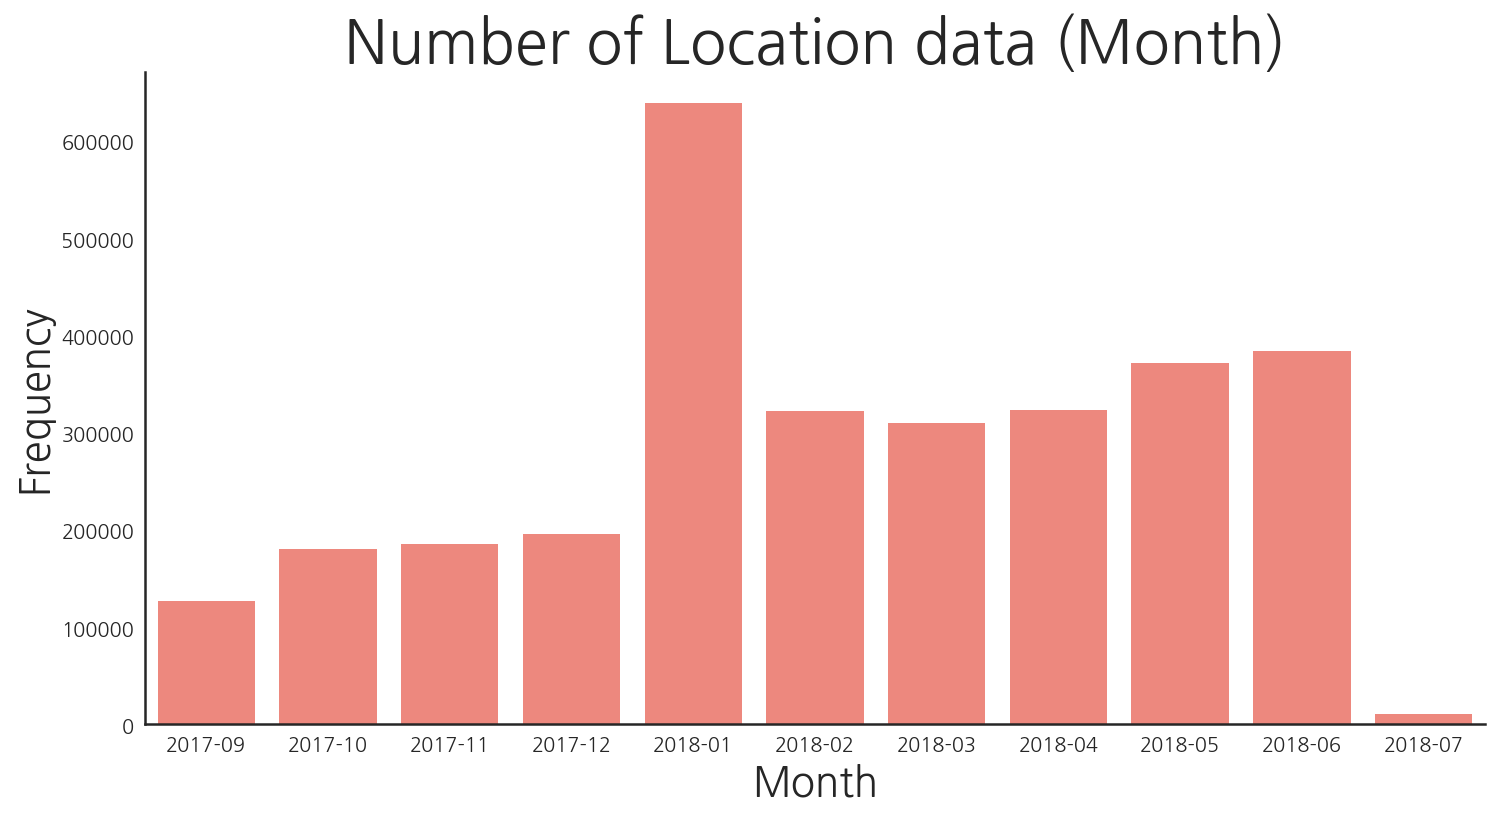

In [35]:
# 2017년의 데이터보다는 2018년의 데이터가 많고, 특히 2018년 1월에 집계된 데이터가 많음

sample_Location_month = sample_Location['time'].map(lambda x: x[:7]).reset_index().groupby('time').count()

plt.figure(figsize=(12,6))

sns.barplot(x=sample_Location_month.index, y=sample_Location_month['index'],  color='#ff796c')
sns.despine()

plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Number of Location data (Month)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

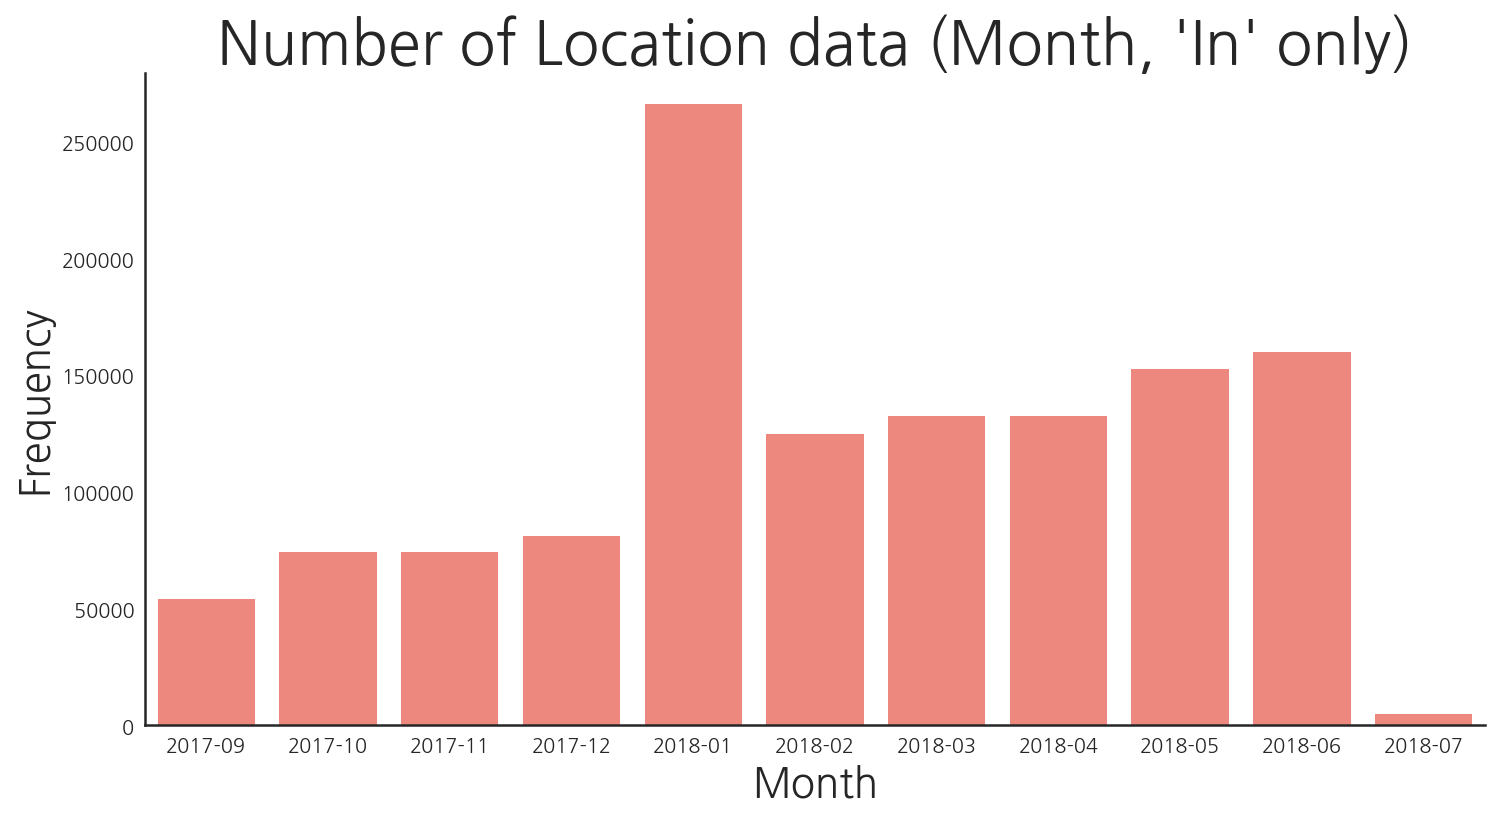

In [36]:
# in_near == 'In'인 데이터만 따로 보아도 비슷한 패턴

sample_Location_month = sample_Location[lambda x: x.in_near == 'In']['time'].map(lambda x: x[:7]).reset_index().groupby('time').count()

plt.figure(figsize=(12,6))

sns.barplot(x=sample_Location_month.index, y=sample_Location_month['index'],  color='#ff796c')
sns.despine()

plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Number of Location data (Month, 'In' only)", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [37]:
# 데이터가 수집된 첫 시점과 마지막 시점
# 작년 9월 6일부터 올해 7월 1일까지의 패널 이동 데이터가 담겨있음

sample_Location_time = sample_Location['time'].map(lambda x: x.split('.')[0])
sample_Location_time = sample_Location_time.map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
# sample_Loaction_time = sample_Loaction['time'].map(lambda x: datetime.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
print('min :', sample_Location_time.min(), ' , ' , 'max :', sample_Location_time.max())

min : 2017-09-06 08:44:43  ,  max : 2018-07-01 23:59:35


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


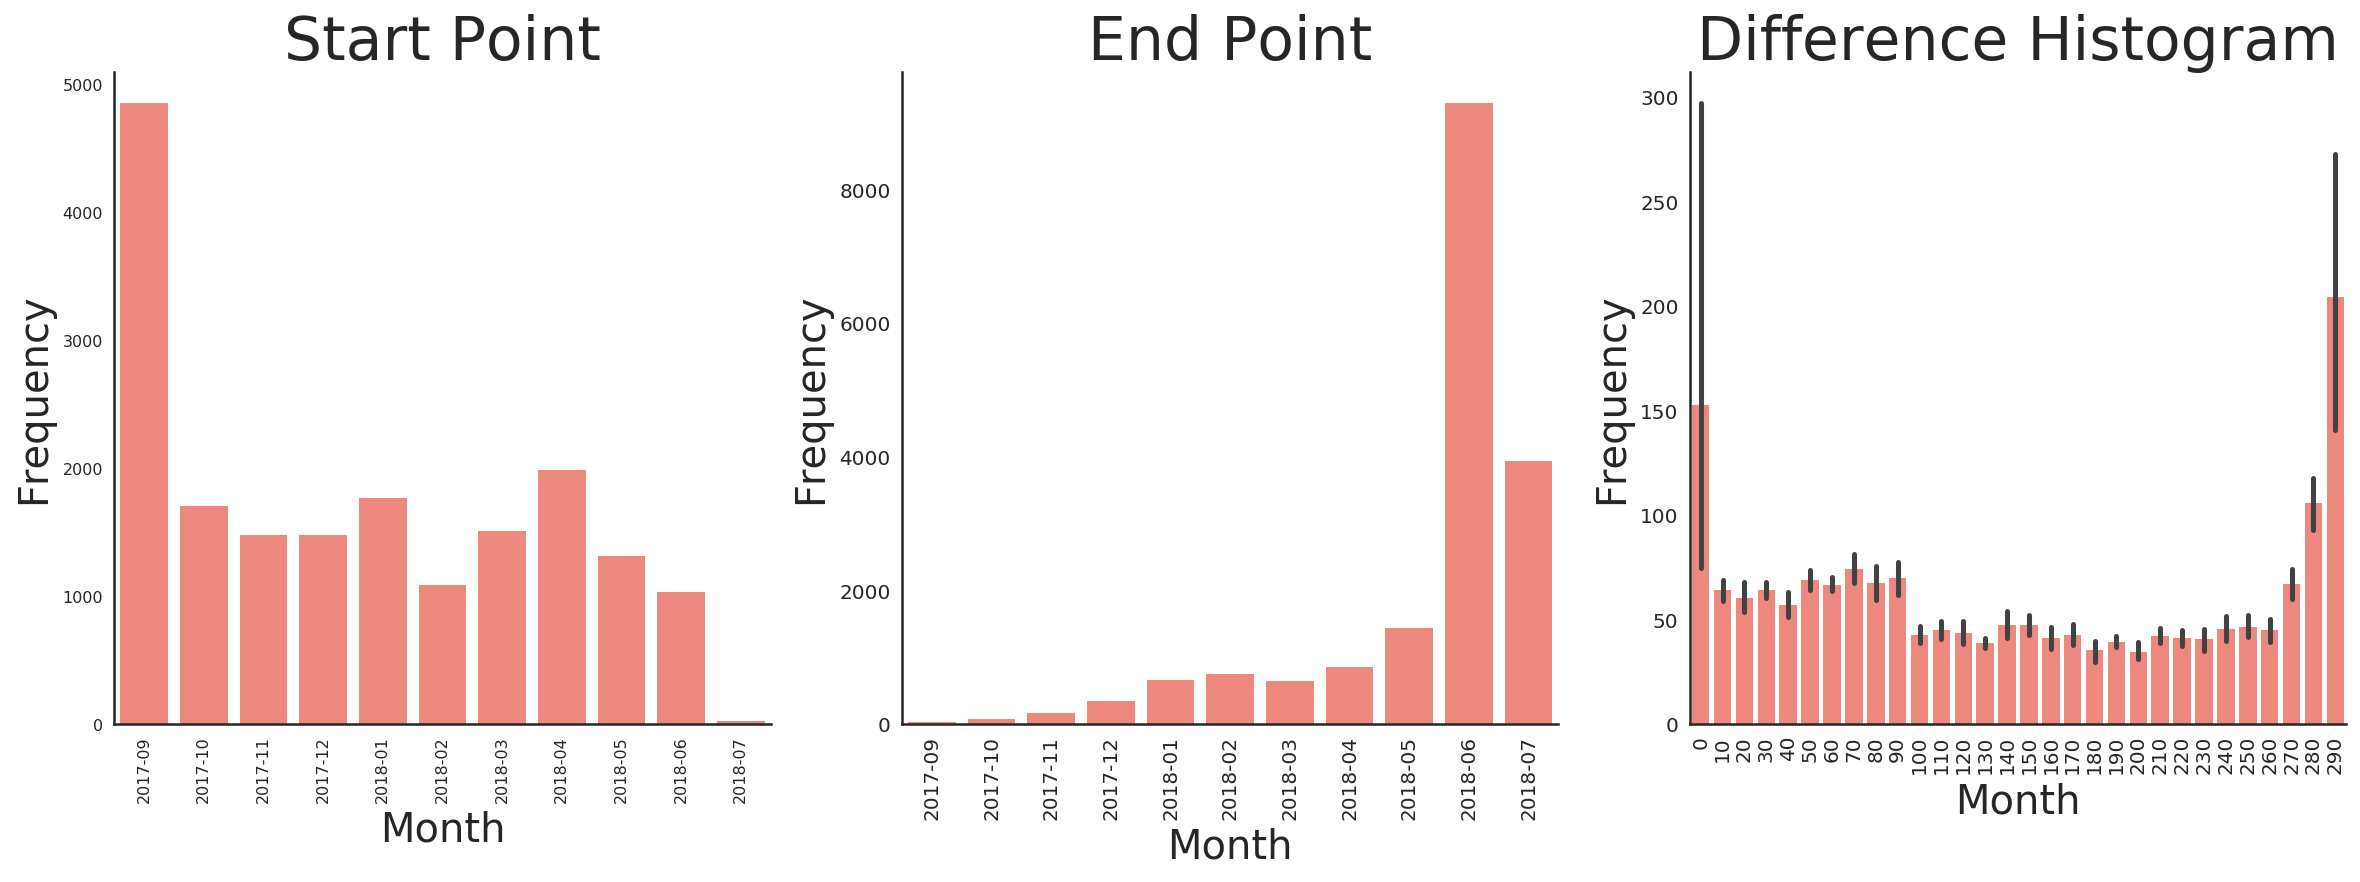

In [13]:
# 각 패널마다 데이터 수집이 시작된 시점과 끝난 시점이 각각 다르지 않을까?
# 데이터 수집이 시작된 17년 9월부터 위치데이터가 포착된 패널이 많긴 하지만, 이후 꾸준히 일정 수의 패널이 추가되는 모습
# 끝난 시점은 대부분 18년 6월으로 비슷하긴 하지만, 그 이전부터도 포착이 종료된 사람들이 있음
# 데이터가 수집된 기간은 각자 0일부터 280일까지 다양함
# 위치데이터 수집 기간이 패널마다 제각각이라는 것을 확인


sample_Location_duplicate = sample_Location.dropna(thresh=11)
sample_Location_duplicate['time'] = sample_Location_duplicate['time'].map(lambda x: x.split('.')[0]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

sample_Location_strptime = sample_Location_duplicate.groupby('pid')['time'].agg([min,max])
sample_Location_strptime['diff'] = sample_Location_strptime['max'] - sample_Location_strptime['min']
sample_Location_strptime['diff'] = sample_Location_strptime['diff'].map(lambda x: str(x).split(" ")[0])
sample_Location_strptime['min_month'] = sample_Location_strptime['min'].map(lambda x: str(x)[:7])
sample_Location_strptime['max_month'] = sample_Location_strptime['max'].map(lambda x: str(x)[:7])


plt.figure(figsize=(20,6))

plt.subplot(131)
sample_Location_strptime_min_month = sample_Location_strptime['min_month'].reset_index().groupby('min_month').count()
sns.barplot(x=sample_Location_strptime_min_month.index, y=sample_Location_strptime_min_month['pid'],  color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Start Point", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.subplot(132)
sample_Location_strptime_max_month = sample_Location_strptime['max_month'].reset_index().groupby('max_month').count()
sns.barplot(x=sample_Location_strptime_max_month.index, y=sample_Location_strptime_max_month['pid'],  color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("End Point", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.subplot(133)
sample_Location_strptime_diff = sample_Location_strptime['diff'].reset_index().groupby('diff').count().reset_index()
sample_Location_strptime_diff['diff'] = sample_Location_strptime_diff['diff'].map(lambda x: int(x))//10*10
sample_Location_strptime_diff = sample_Location_strptime_diff.sort_values(by='diff')
sns.barplot(x='diff', y='pid', data=sample_Location_strptime_diff, color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Difference Histogram", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

In [14]:
sample_Location_strptime.head()

,min,max,diff,min_month,max_month
pid,,,,,
A0000910,2017-09-10 12:36:28,2018-06-27 12:03:26,289,2017-09,2018-06
A0001355,2018-06-22 16:28:53,2018-06-22 16:28:53,0,2018-06,2018-06
A0002394,2018-03-28 11:48:35,2018-06-30 16:44:51,94,2018-03,2018-06
A0002542,2018-04-12 14:29:43,2018-06-29 20:36:49,78,2018-04,2018-06
A0003204,2018-03-12 12:30:42,2018-07-01 14:12:17,111,2018-03,2018-07


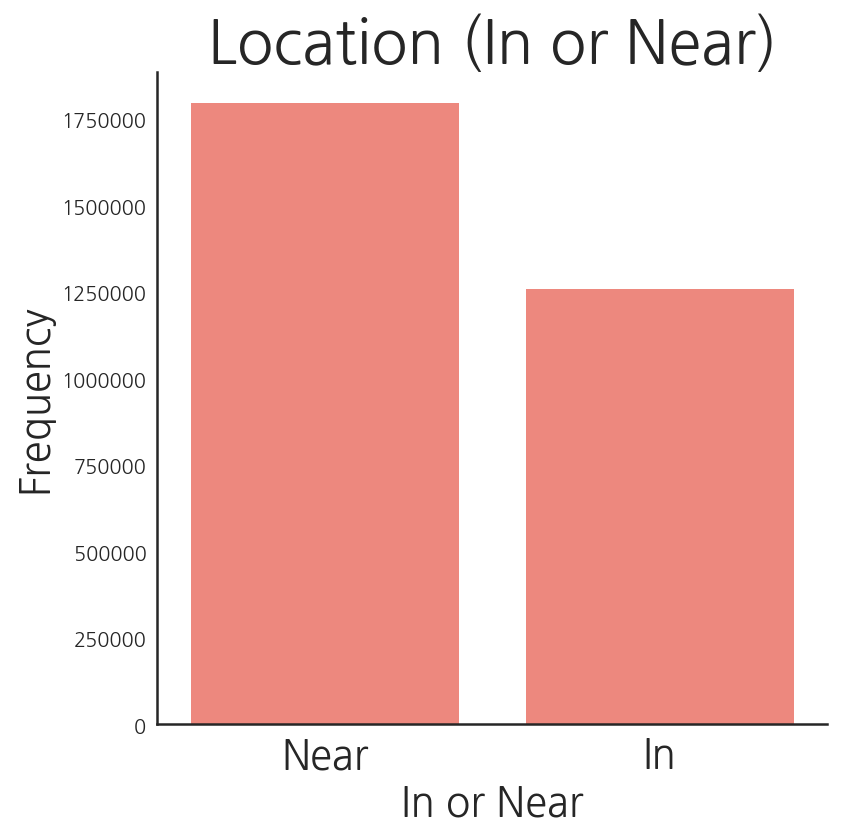

In [40]:
# 역시 In에 해당하는 데이터보다는 근처를 지나간 Near 데이터가 더 많았음

sample_Location_in_near = sample_Location['in_near'].value_counts()

plt.figure(figsize=(6,6))

sns.barplot(x=sample_Location_in_near.index, y=sample_Location_in_near.values,  color='#ff796c')
sns.despine()

plt.xlabel('In or Near', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Location (In or Near)', fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

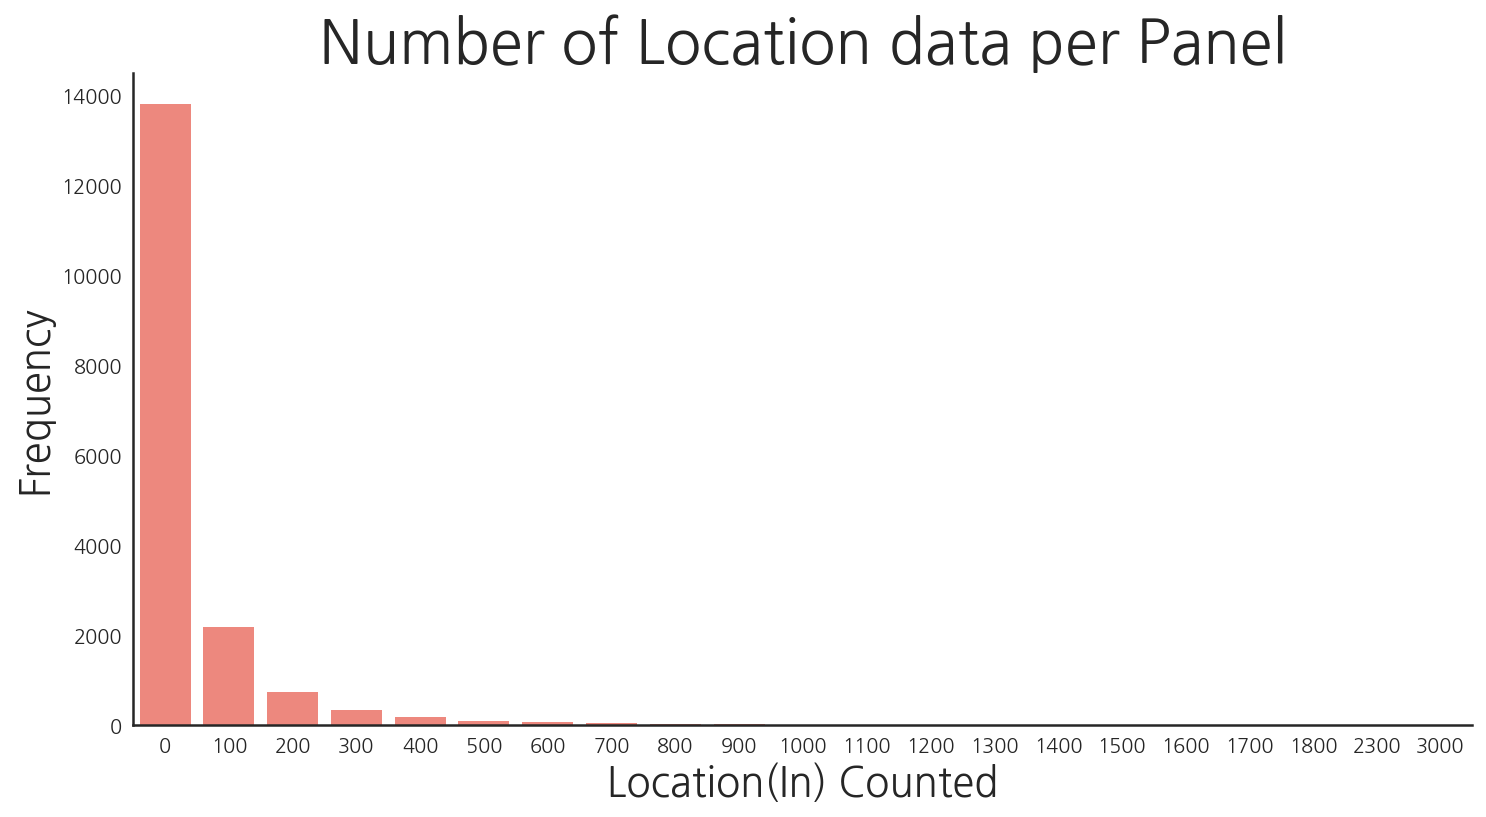

In [46]:
# 단말기 근처를 지나간 것(Near)은 중요한 정보가 되지 못하므로, In인 경우에 한하여 각 패널당 어느 정도의 데이터가 집계되었는지 확인
# 0 -> 0~99개의 데이터, 100 -> 100~199개의 데이터, ....
# 대부분의 패널이 300개 미만의 위치 데이터를 제공하였음
# 생각보다 위치 데이터 정보의 질이 좋지 못함....

Location_count = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().map(lambda x: x//100*100).value_counts()

plt.figure(figsize=(12,6))
plt.xlabel('Location(In) Counted', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Number of Location data per Panel', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_count.index, y=Location_count.values,  color='#ff796c')
sns.despine()

plt.show()

In [15]:
# 집계된 데이터의 수와 기간 사이에는 양의 상관관계가 있을까?
# 상식적으로 집계 기간이 길수록 포착된 데이터도 많아야 할 것이다

sample_Location_strptime = sample_Location_strptime.reset_index()

sample_Location_length = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().reset_index()
sample_Location_length.columns = ['pid', 'count']

sample_Location_len_strp = sample_Location_length.merge(sample_Location_strptime, how='inner', on='pid')
sample_Location_len_strp['diff'] = sample_Location_len_strp['diff'].map(lambda x: int(x))
sample_Location_len_strp['count_diff_ratio'] = (sample_Location_len_strp['count']/sample_Location_len_strp['diff']).round(1)

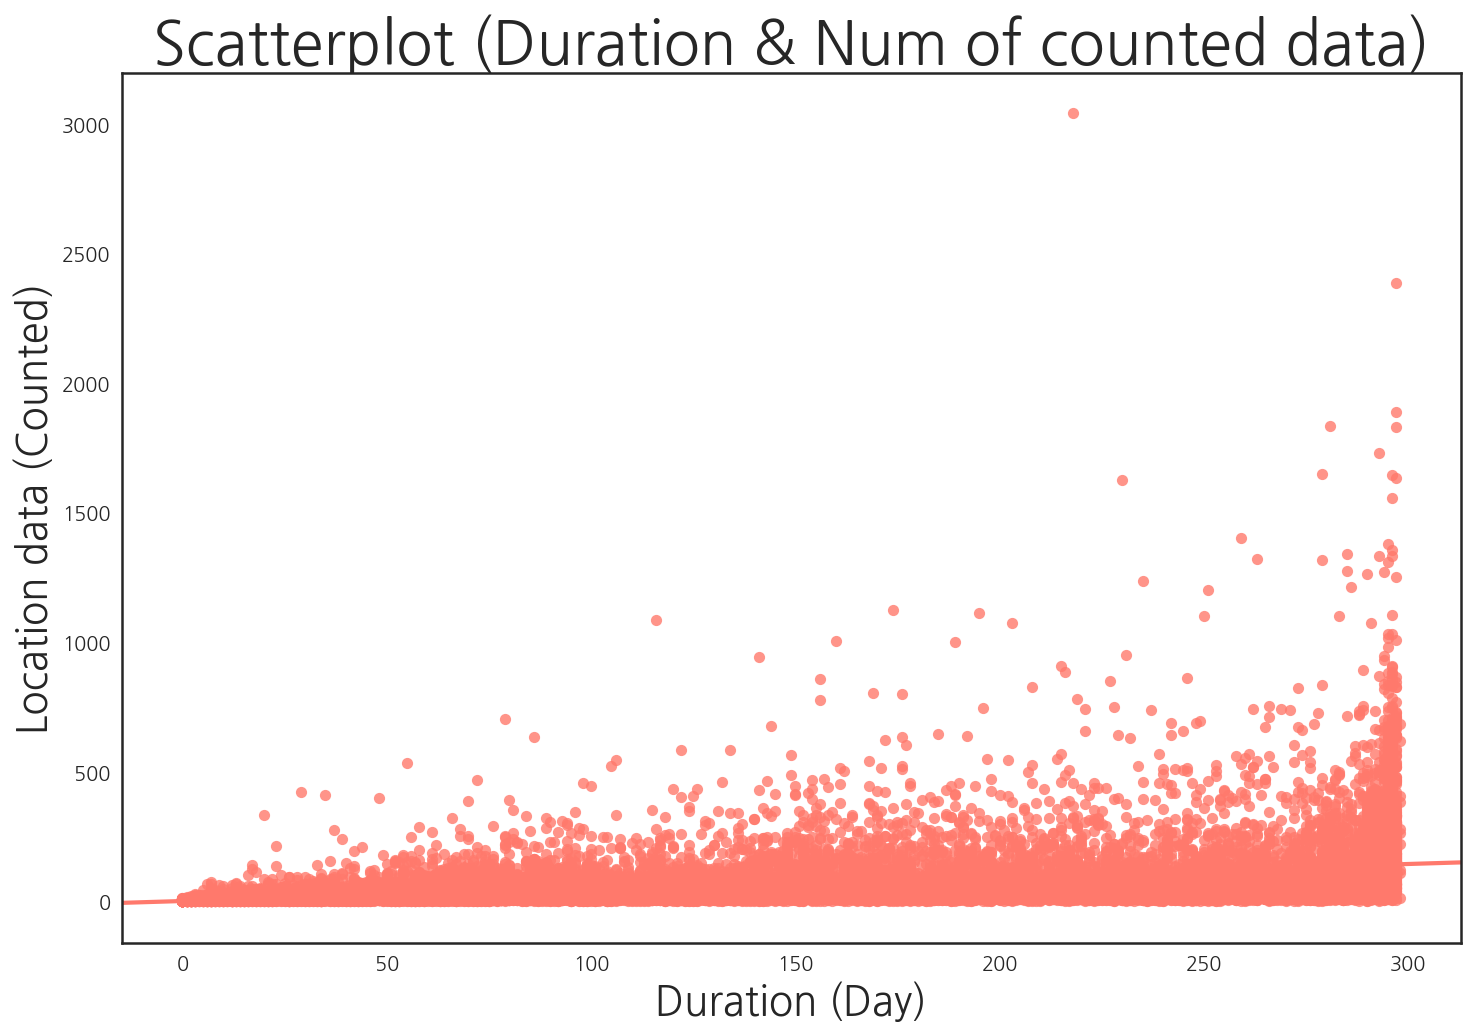

In [43]:
# 일단 보기에는 기간에 상관없이 300건 미만으로 집계된 패널이 다수
# 어쨌든 기간이 길어질수록 집계되는 위치데이터도 많아지긴 함

plt.figure(figsize=(12,8))

sns.regplot(x="diff", y="count", data=sample_Location_len_strp, color='#ff796c' )

plt.xlabel('Duration (Day)', fontsize=20)
plt.ylabel('Location data (Counted)', fontsize=20)
plt.title('Scatterplot (Duration & Num of counted data)', fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

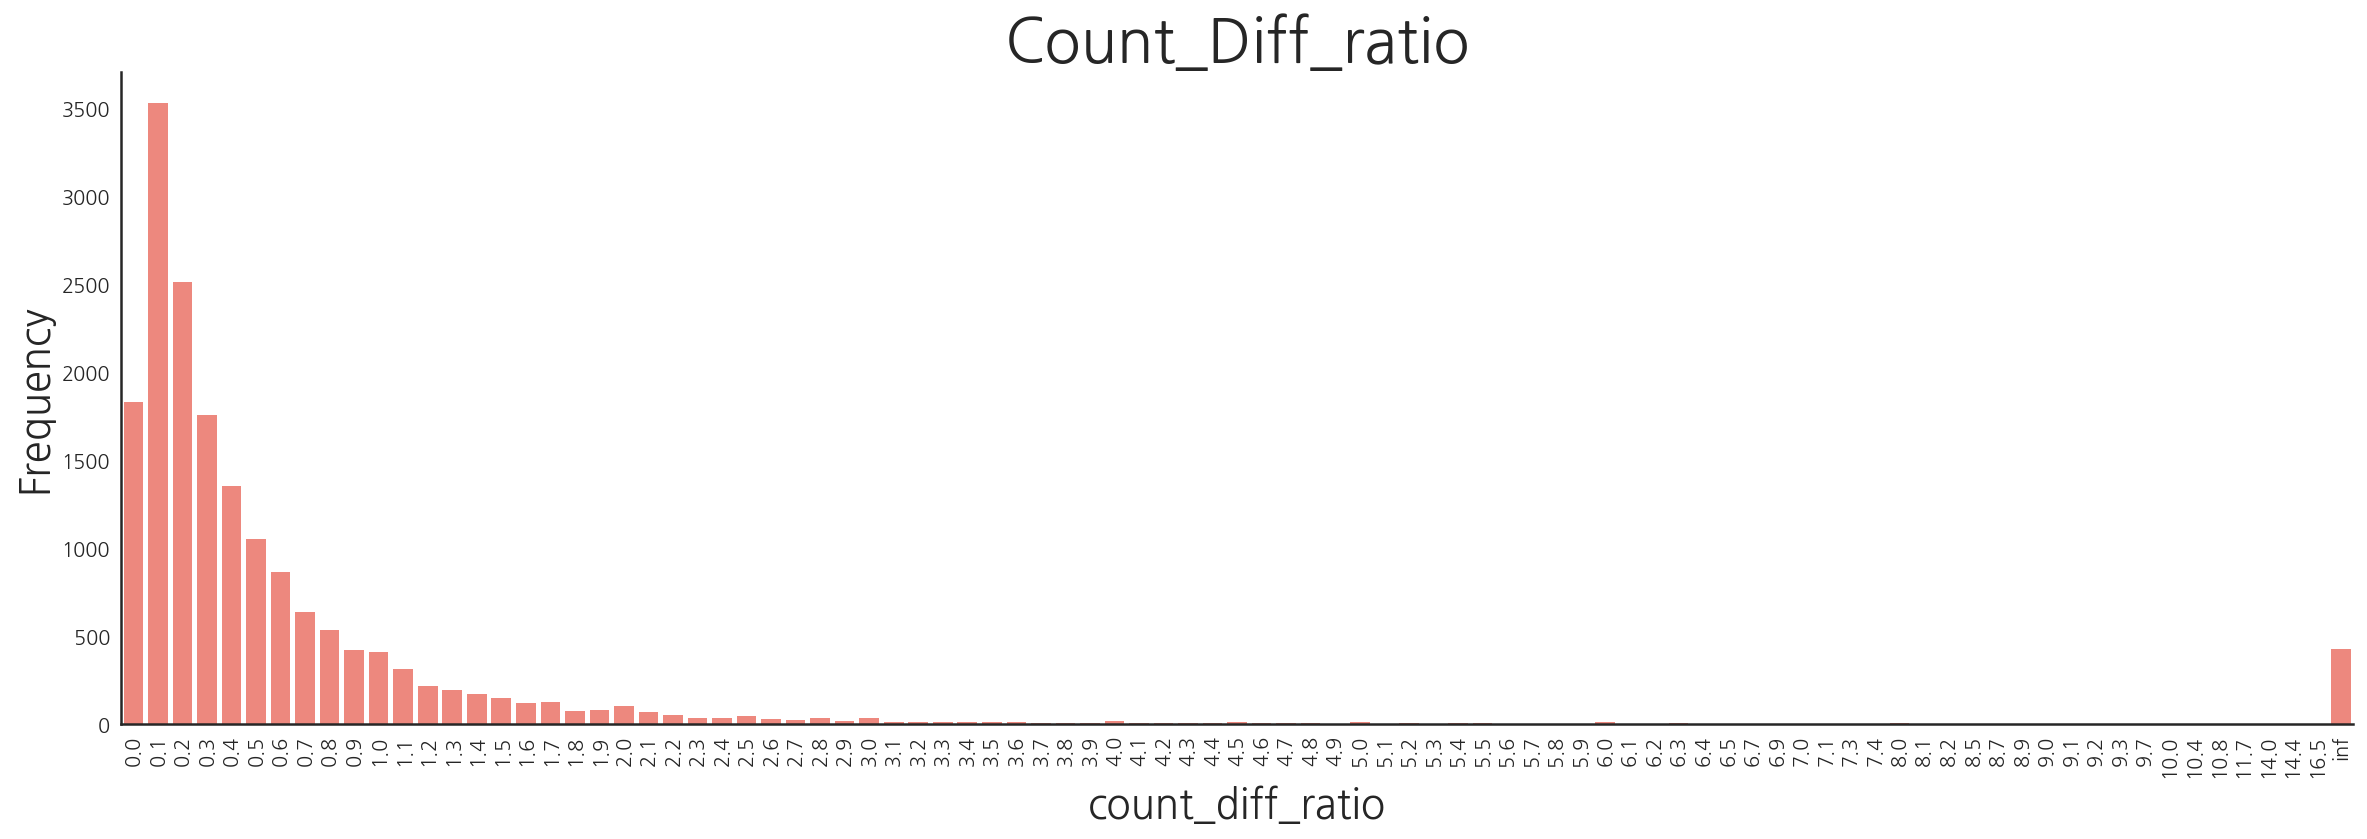

In [45]:
# 집계기간과 집계된 데이터 수의 비율
# 가장 많이 집계된 0.1 의 의미 : 하루에 집계된 데이터 수가 0.1개~0.1999개 (5일~10일에 한번 꼴로 위치데이터 들어옴)
# 로플랫 단말기가 있는 곳을 안가서일까? 하루에 1번 이상 집계된 사람이 드물 정도...

sample_Location_ratio = sample_Location_len_strp.groupby('count_diff_ratio')['pid'].count()

plt.figure(figsize=(20,6))
plt.xlabel('count_diff_ratio', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Count_Diff_ratio', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=sample_Location_ratio.index, y=sample_Location_ratio.values, color='#ff796c')
sns.despine()

plt.show()

In [47]:
# 총 156,569곳의 위치에 대한 데이터

len(sample_Location['placename'].value_counts())

156569

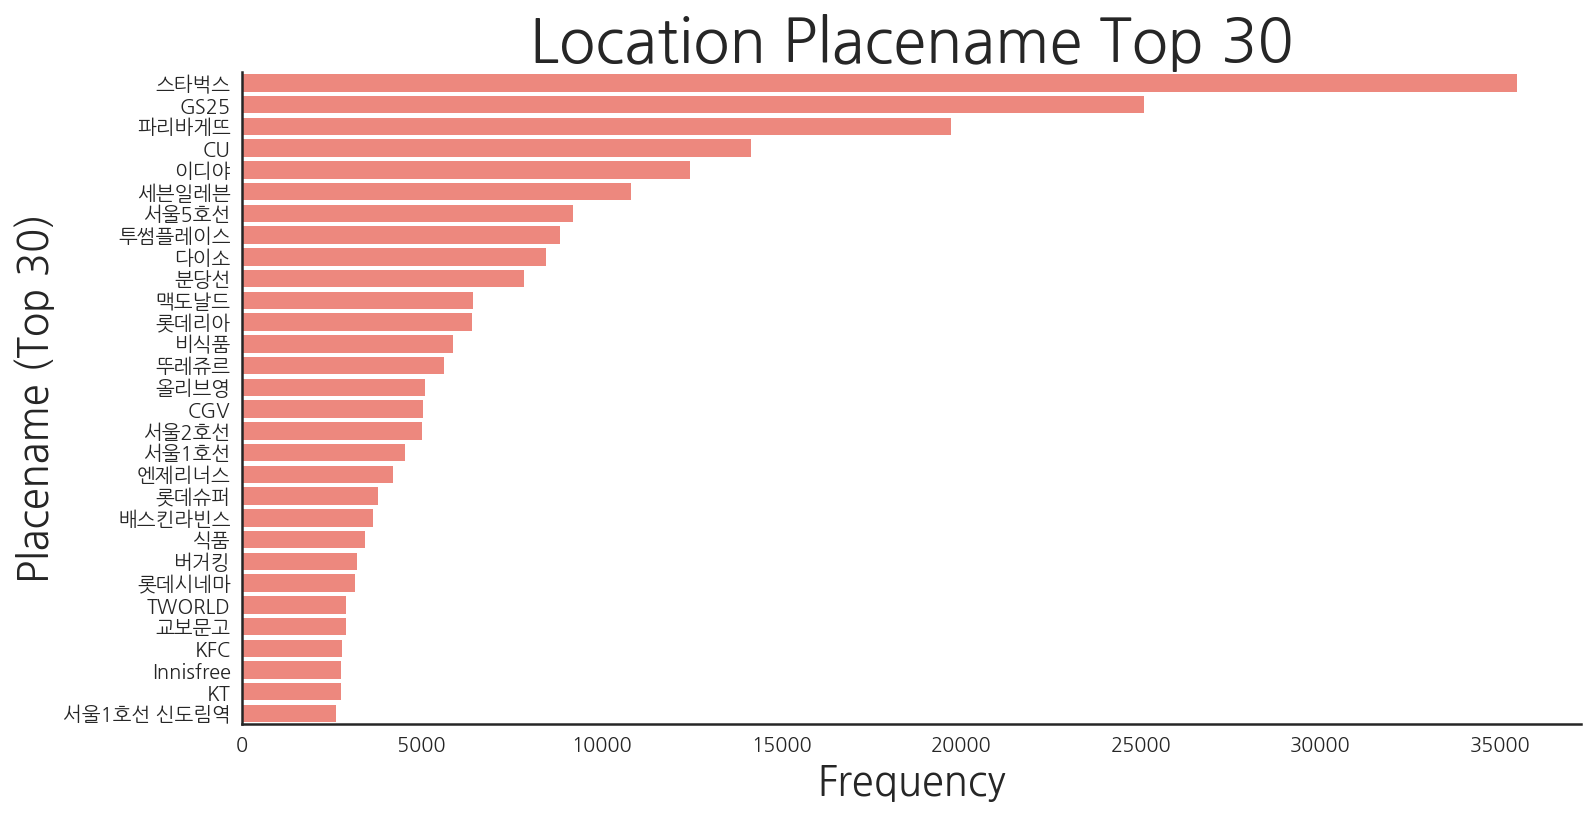

In [110]:
# 사람들이 가장 많이 방문한 곳 상위 30개
# 편의점과 까페가 상위권을 차지하고 있음

Location_placename_top30 = sample_Location[lambda x: x.in_near == 'In']['placename'].value_counts()[:30]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 30)', fontsize=20)
plt.title('Location Placename Top 30', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_placename_top30.values, y=Location_placename_top30.index,  color='#ff796c')
sns.despine()


plt.show()

In [49]:
# 총 216개의 카테고리가 존재

len(sample_Location['category'].value_counts())

216

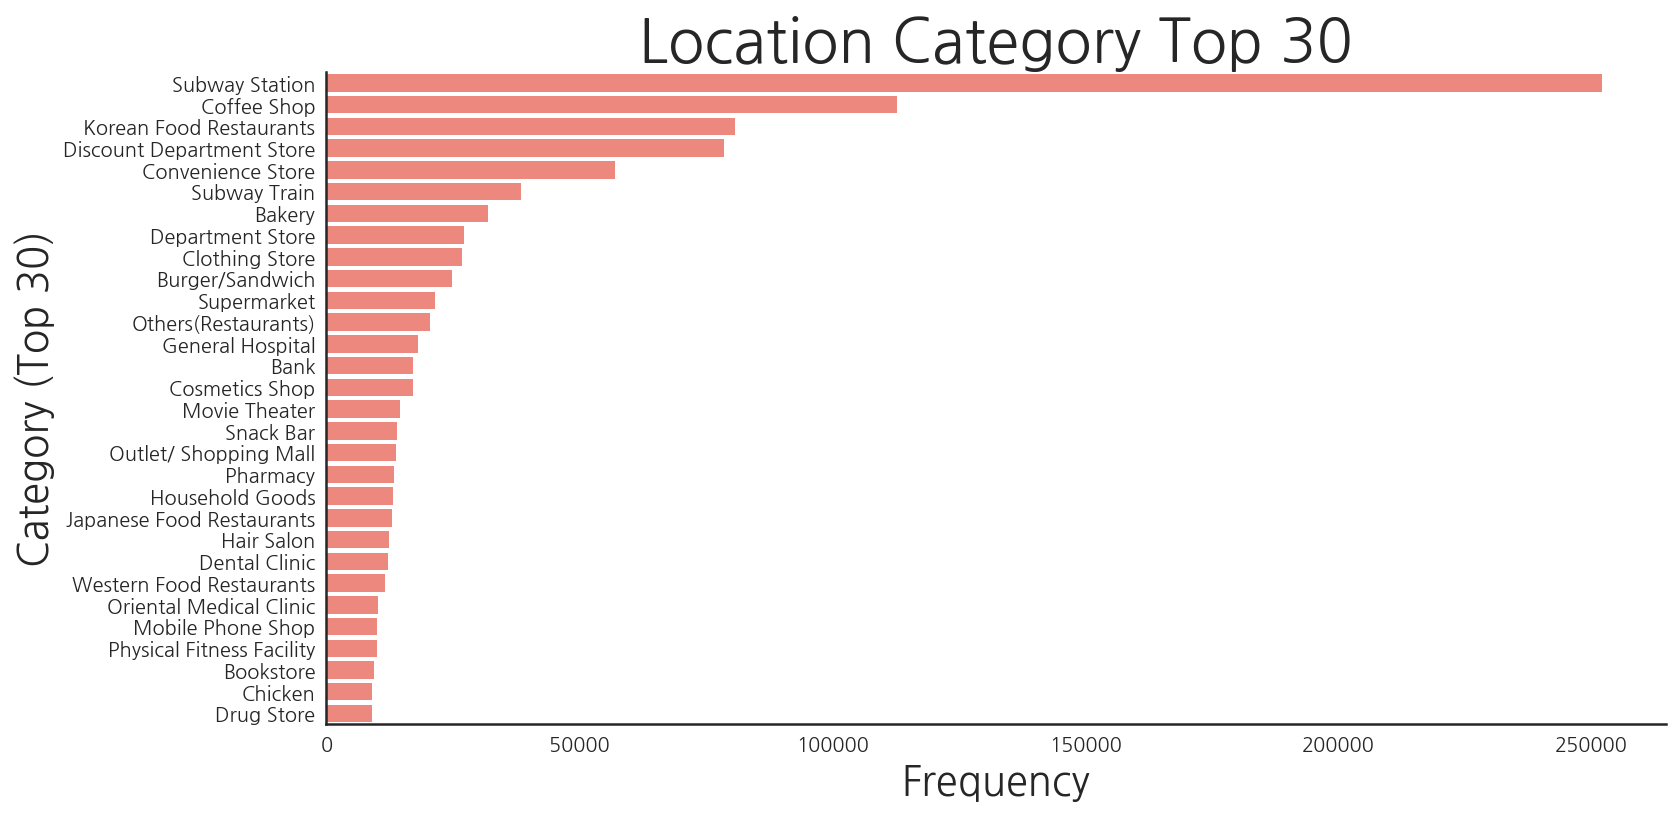

In [111]:
# 빈도가 높은 카테고리 상위 30개
# 지하철, 카페, 한식점, 편의점, 아울렛 순으로 방문 기록이 많음

Location_category_top30 = sample_Location[lambda x: x.in_near == 'In']['category'].value_counts()[:30]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Category (Top 30)', fontsize=20)
plt.title('Location Category Top 30', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_category_top30.values, y=Location_category_top30.index,  color='#ff796c')
sns.despine()

plt.show()

In [52]:
sample_Location_address = sample_Location['address'].map(lambda x: str(x).split(" ")[0]).map(lambda x: 
                                                                   '서울' if x in ['서울','서울특별시','서울시'] 
                                                                   else '경기' if x in ['경기','경기도']
                                                                   else '인천' if x in ['인천','인천광역시','인천시']
                                                                   else '부산' if x in ['부산','부산광역시','부산시']
                                                                   else '대전' if x in ['대전','대전시','대전광역시']
                                                                   else '경남' if x in ['경남','경상남도']
                                                                   else '경북' if x in ['경북','경상북도']
                                                                   else '대구' if x in ['대구','대구광역시']
                                                                   else '광주' if x in ['광주','광주광역시']
                                                                   else '전북' if x in ['전북','전라북도']
                                                                   else '울산' if x in ['울산','울산광역시']
                                                                   else '전남' if x in ['전남','전라남도']
                                                                   else '강원' if x in ['강원','강원도']
                                                                   else '충북' if x in ['충북','충청북도']
                                                                   else '제주' if x in ['제주','제주특별자치도']
                                                                   else '세종' if x in ['세종','세종특별자치시']
                                                                   else '충남' if x in ['충남','충청남도']
                                                                   else x
                                                                    ).value_counts()

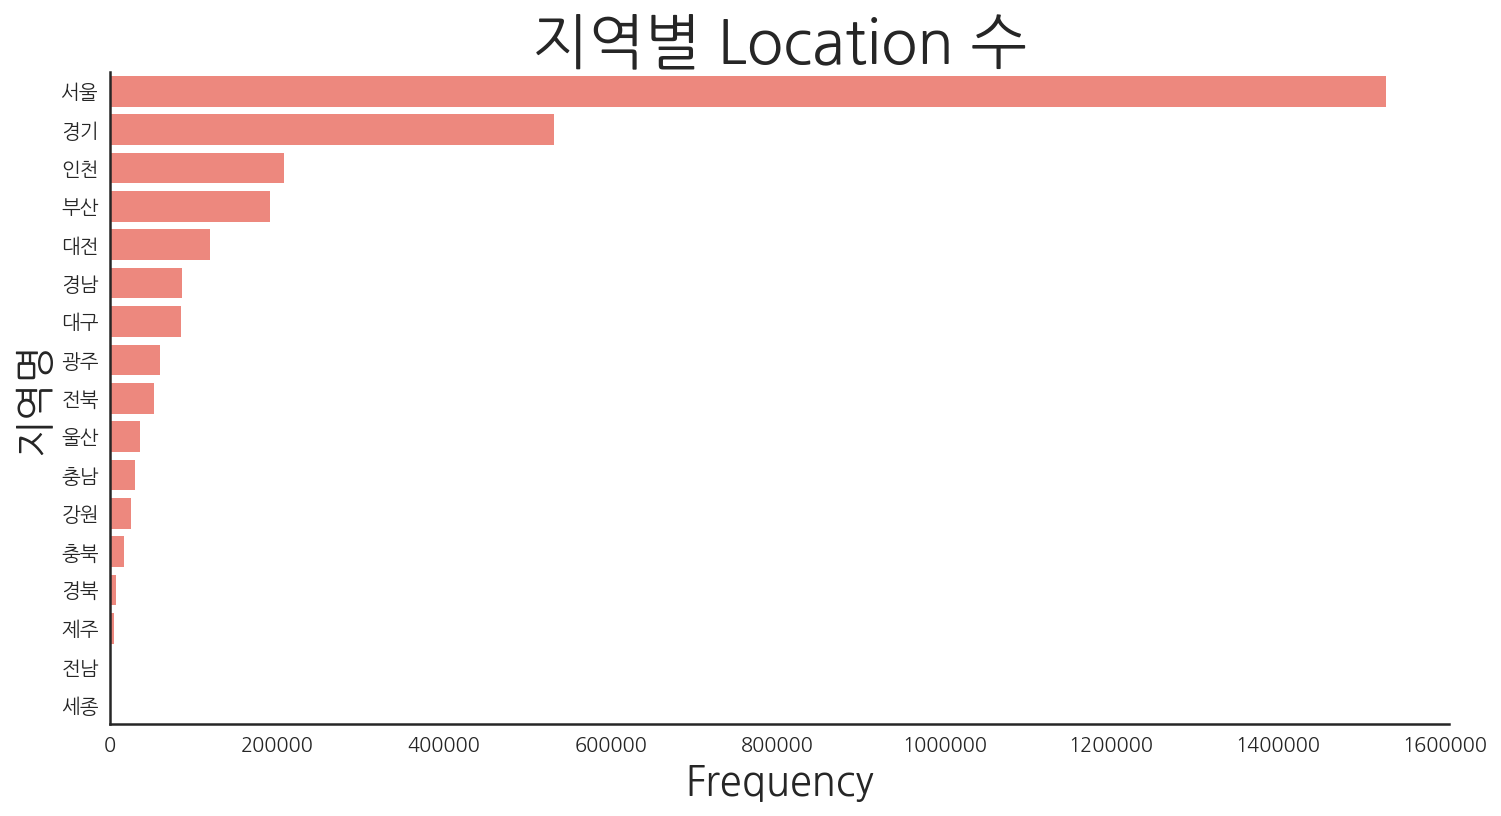

In [54]:
# 서울 및 경기 지역에서 포착된 데이터가 압도적으로 많은 것을 확인

sample_Location_address = sample_Location_address[lambda x: x.index != 'nan'][lambda x: x.index != 'None'][lambda x: x.values > 10]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('지역명', fontsize=20)
plt.title('지역별 Location 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=sample_Location_address.values, y=sample_Location_address.index,  color='#ff796c')
sns.despine()

plt.show()

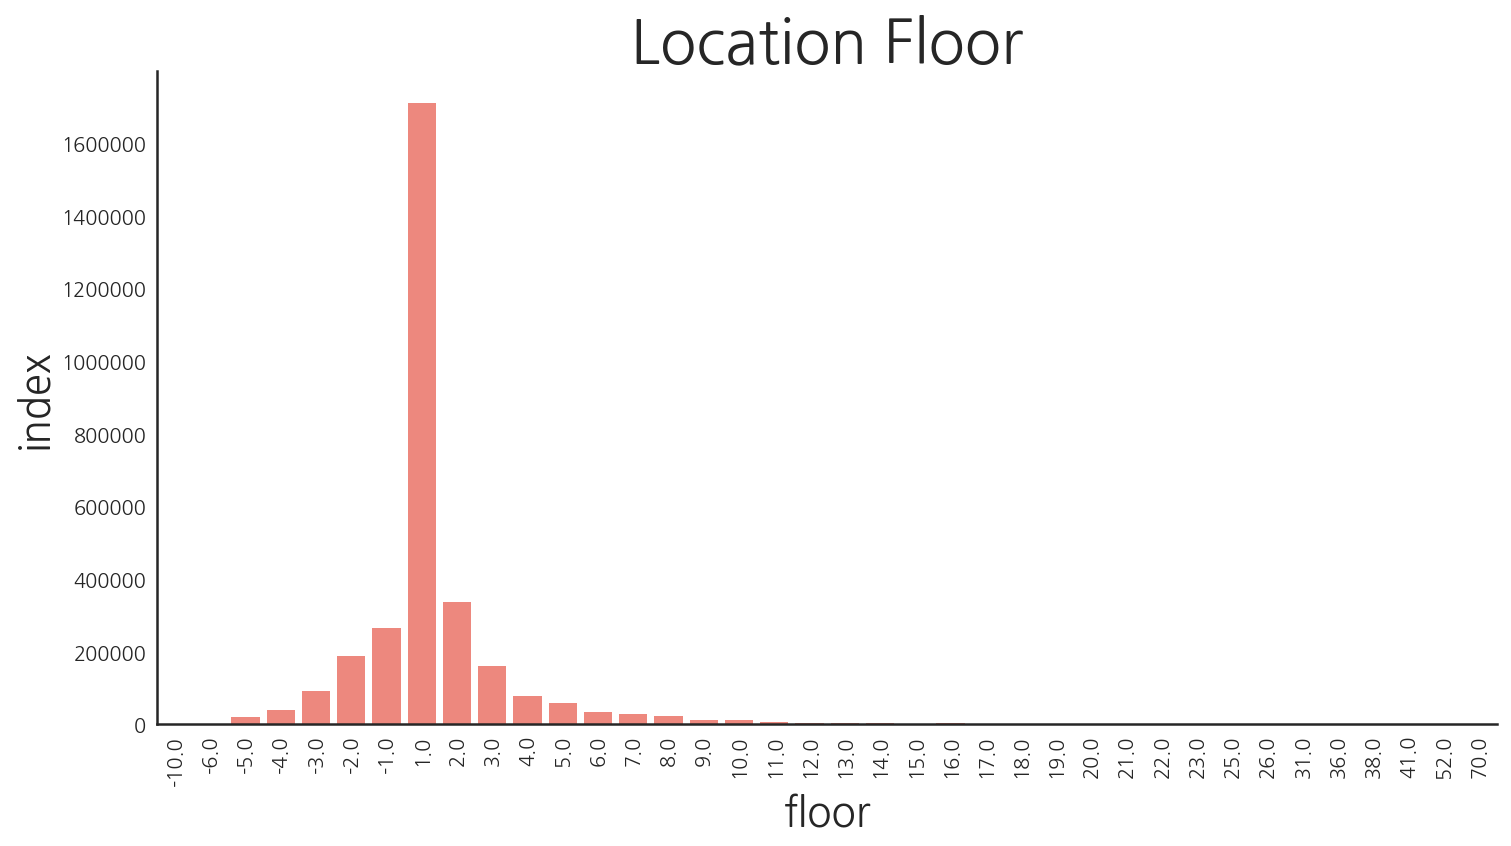

In [65]:
# Floor는 역시 1층이 압도적, 지하나 지상의 데이터도 어느 정도 관찰됨

sample_Location_floor = sample_Location['floor'][lambda x: x.notnull()].reset_index().groupby('floor').count().reset_index()

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Floor', fontsize=20)
plt.title('Location Floor', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x='floor', y='index', data= sample_Location_floor,  color='#ff796c')
sns.despine()

plt.show()

In [57]:
sample_Location.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2017-09-06 09:02:05.000,I0274841,하나투어,Near,Travel Agency,서울특별시 강남구 역삼1동,16.0,37.491819,127.031087,70183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2017-09-06 16:40:57.000,P0053069,우리은행,Near,Bank,서울 동작구 노량진동 42-11,1.0,37.513165,126.937856,29984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# 306,896개의 loplat 단말기가 포착

sample_Location['loplat_id'].nunique()

305868

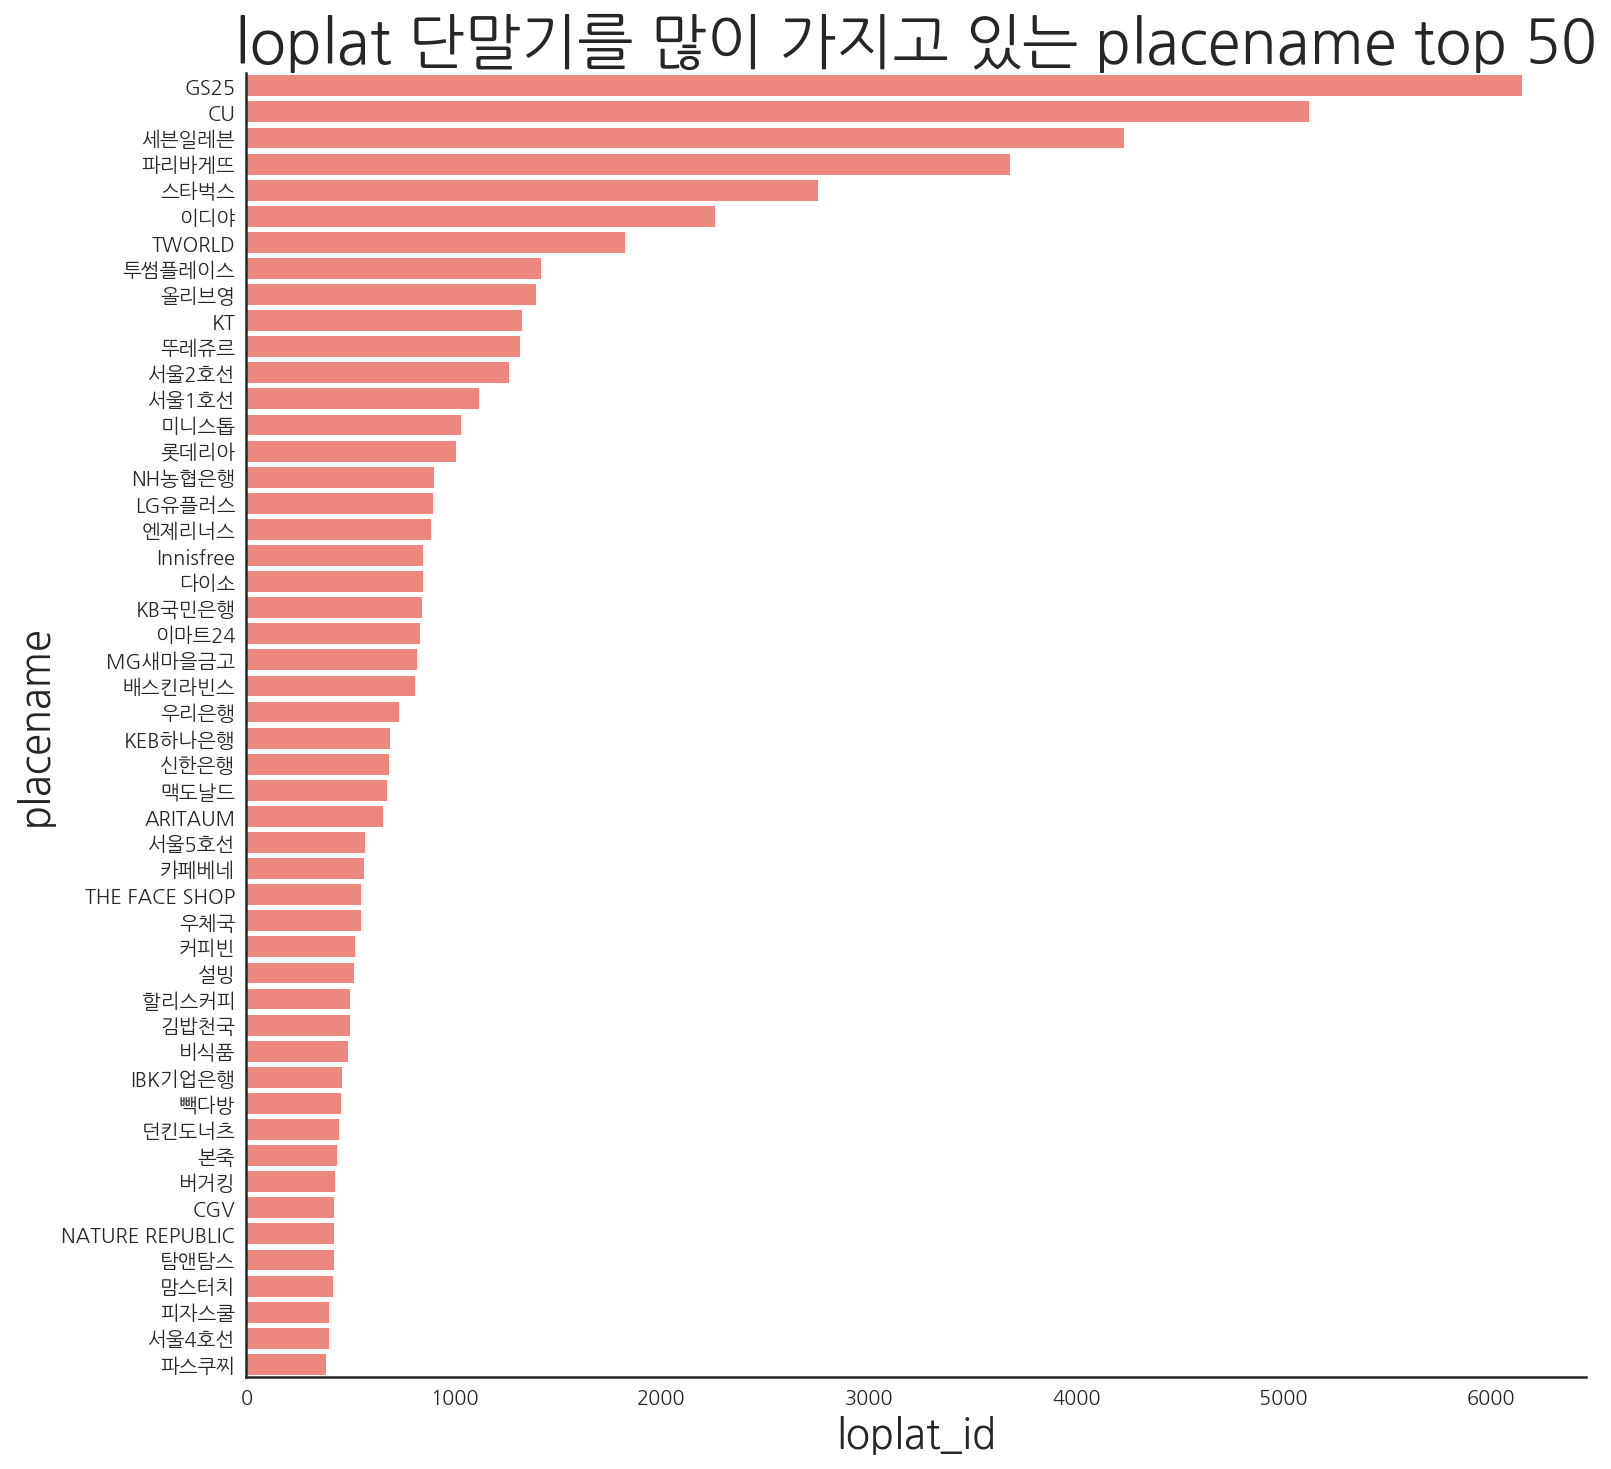

In [78]:
# 단말기를 많이 가지고 있는 Placename top50
# 전부 프랜차이즈 업종, 까페와 편의점이 상위권을 차지


sample_Location_loplat_num = sample_Location.groupby('placename')['loplat_id'].nunique().reset_index().sort_values(by='loplat_id', ascending=False)
sample_Location_loplat_top50 = sample_Location_loplat_num.head(50)

plt.figure(figsize=(12,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 50)', fontsize=20)
plt.title('loplat 단말기를 많이 가지고 있는 placename top 50', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='loplat_id', y='placename', data=sample_Location_loplat_top50, color='#ff796c')
sns.despine()

plt.show()

In [112]:
# 306896개의 장소 중 사람들이 많이 방문한 곳 top 100

sample_Location_popular_loplat = (
                                    sample_Location[lambda x: x.in_near == 'In'].groupby('loplat_id')['idx'].count()
                                      .sort_values(ascending=False)[:100]
                                      .reset_index()
                                      .iloc[0:100,:]
)

sample_Location_loplat_dict = sample_Location.drop_duplicates(subset='loplat_id')[['placename','address','loplat_id']]
sample_Location_popular_loplat = sample_Location_popular_loplat.merge(sample_Location_loplat_dict, how='inner', on='loplat_id')
sample_Location_popular_loplat.columns = ['loplat_id', 'count', 'placename', 'address']

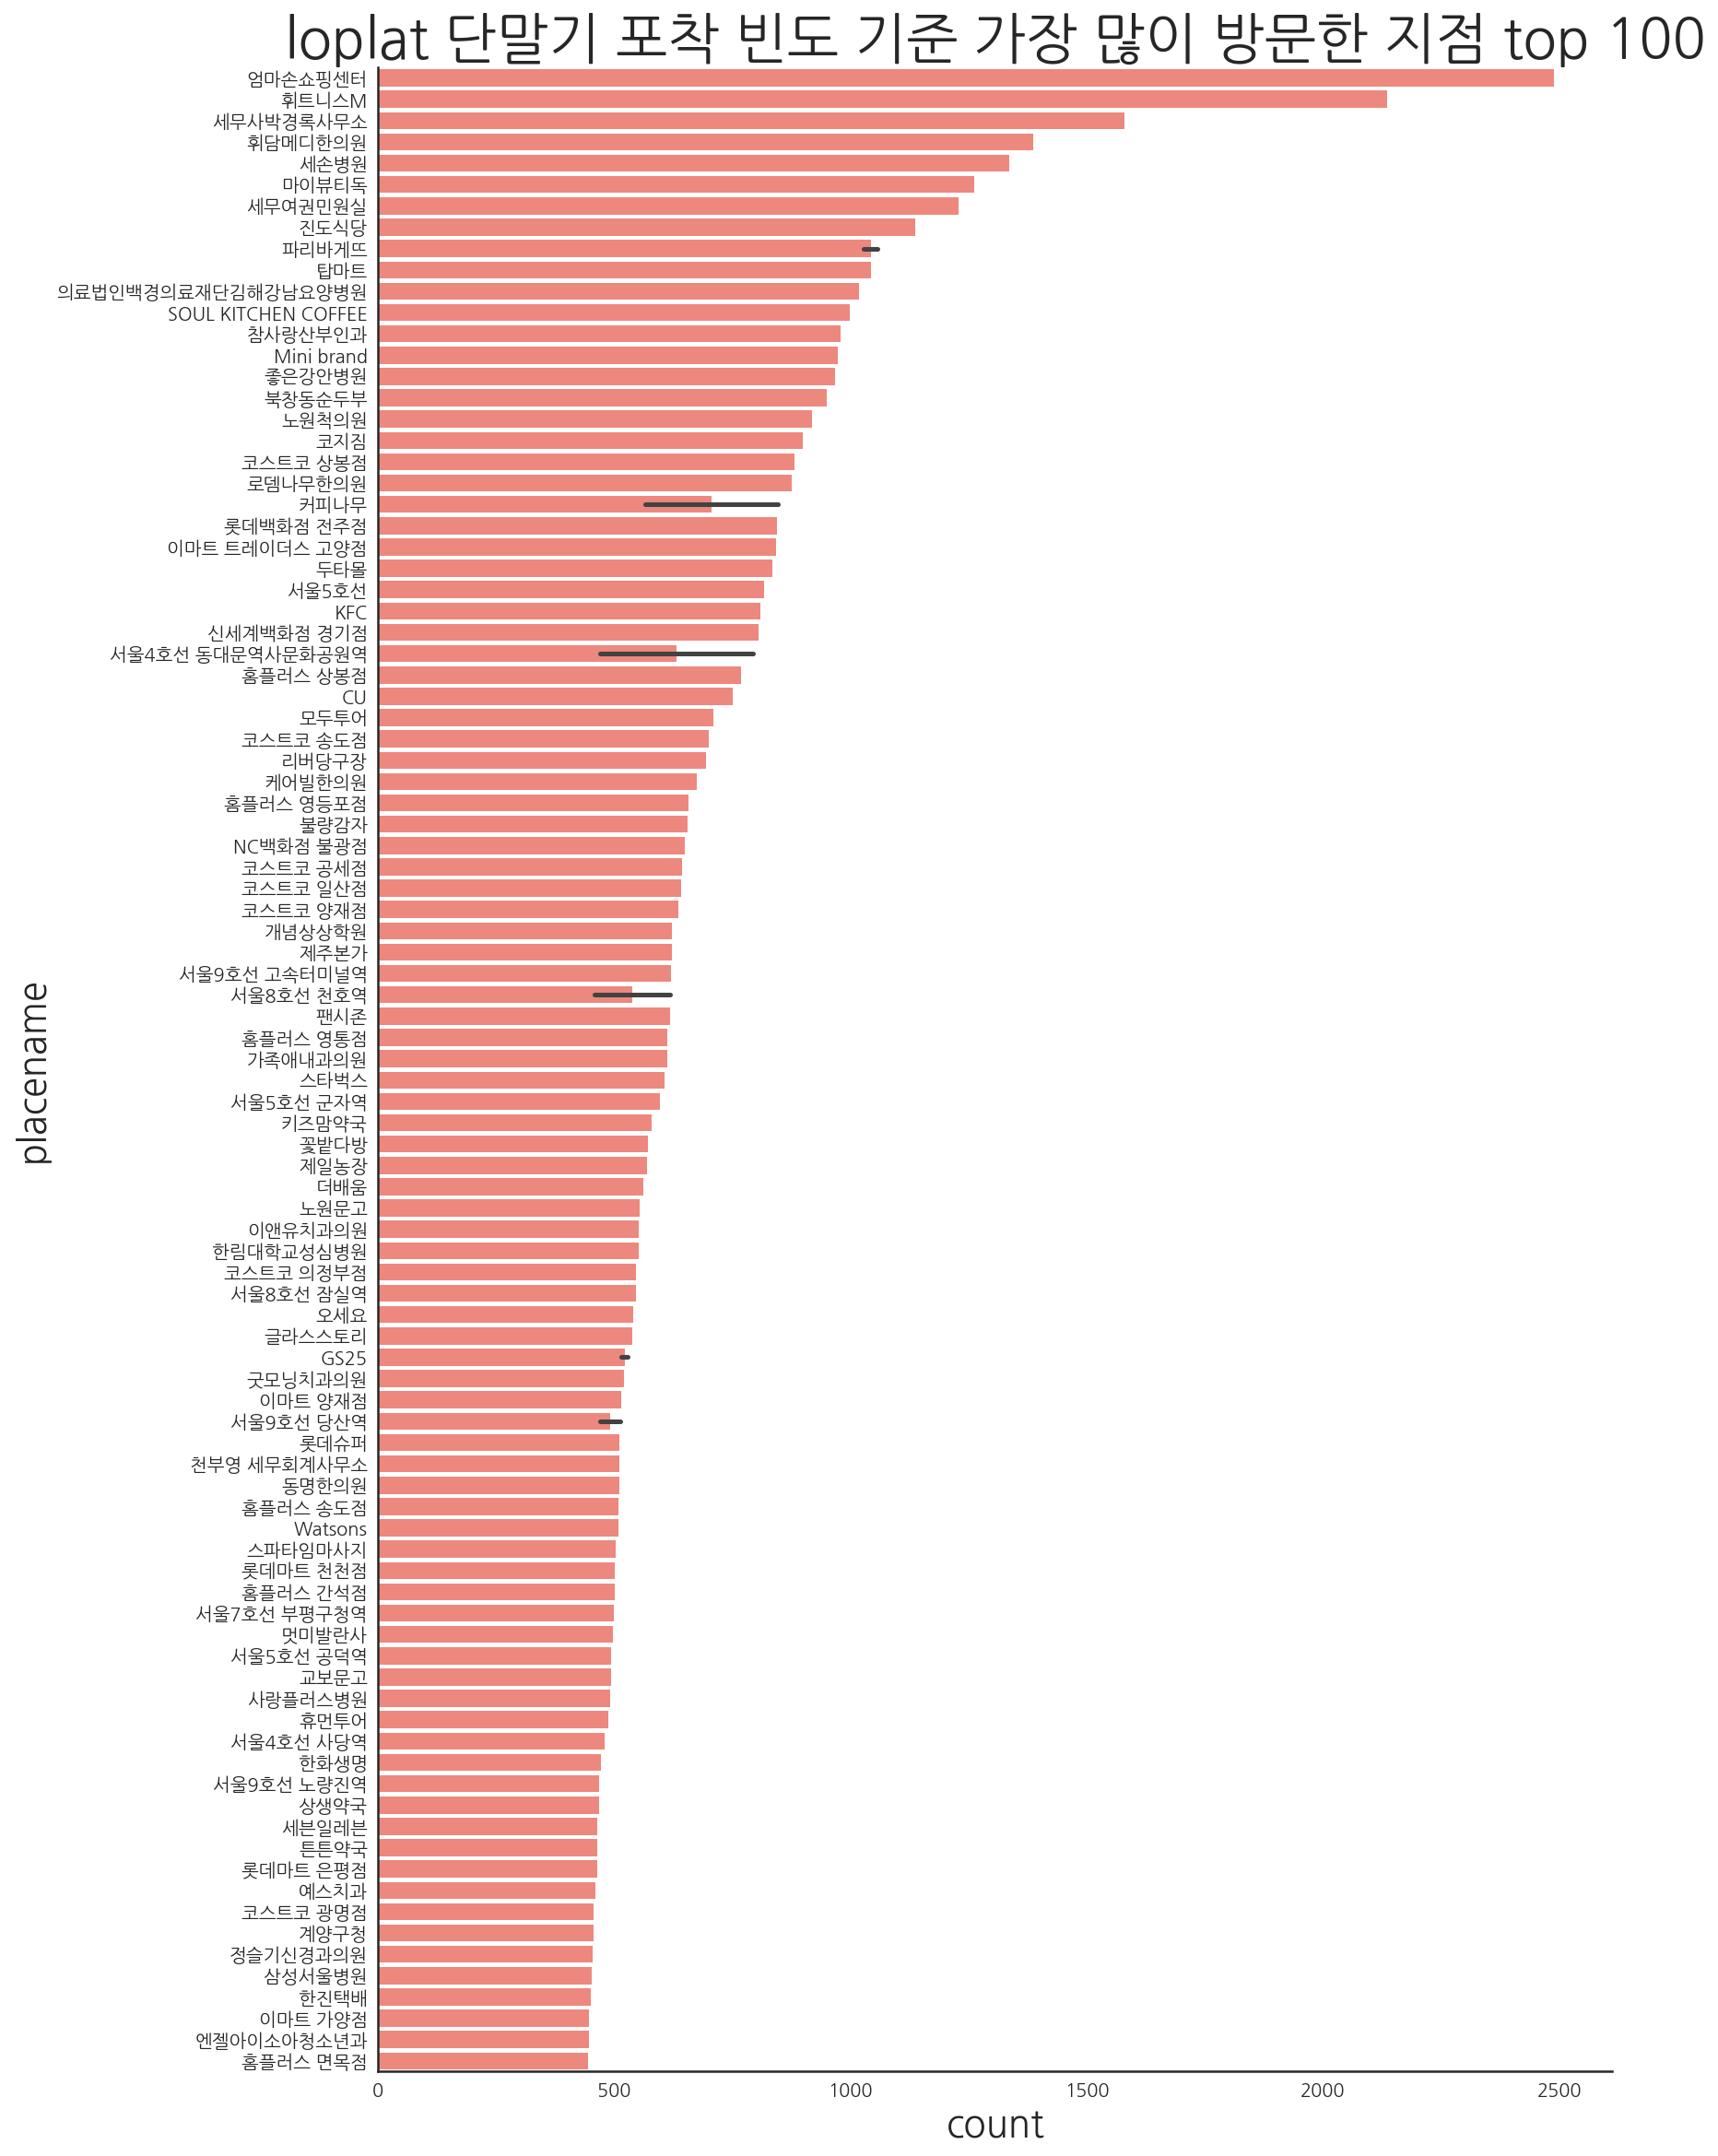

In [116]:
# 프랜차이즈가 많이 포착되었던 placename EDA 결과와는 상이한 모습
# 개별 지점별로 보았을 때에는 병원, 식당, 할인매장 등 다양한 업종의 매장이 상위권에 랭크됨

plt.figure(figsize=(12,20))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 100)', fontsize=20)
plt.title('loplat 단말기 포착 빈도 기준 가장 많이 방문한 지점 top 100', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='count', y='placename', data=sample_Location_popular_loplat, color='#ff796c')
sns.despine()

plt.show()

In [124]:
# 306896개의 장소 중 사람들이 많이 방문한 곳 top 100 지역별 분석

sample_Location_loplat_address = sample_Location_popular_loplat['address'].map(lambda x: x.split(" ")[0]).map(lambda x: 
                                                                   '서울' if x in ['서울','서울특별시','서울시'] 
                                                                   else '경기' if x in ['경기','경기도']
                                                                   else '인천' if x in ['인천','인천광역시','인천시']
                                                                   else '부산' if x in ['부산','부산광역시','부산시']
                                                                   else '대전' if x in ['대전','대전시','대전광역시']
                                                                   else '경남' if x in ['경남','경상남도']
                                                                   else '경북' if x in ['경북','경상북도']
                                                                   else '대구' if x in ['대구','대구광역시']
                                                                   else '광주' if x in ['광주','광주광역시']
                                                                   else '전북' if x in ['전북','전라북도']
                                                                   else '울산' if x in ['울산','울산광역시']
                                                                   else '전남' if x in ['전남','전라남도']
                                                                   else '강원' if x in ['강원','강원도']
                                                                   else '충북' if x in ['충북','충청북도']
                                                                   else '제주' if x in ['제주','제주특별자치도']
                                                                   else '세종' if x in ['세종','세종특별자치시']
                                                                   else '충남' if x in ['충남','충청남도']
                                                                   else x
                                                                    ).value_counts()

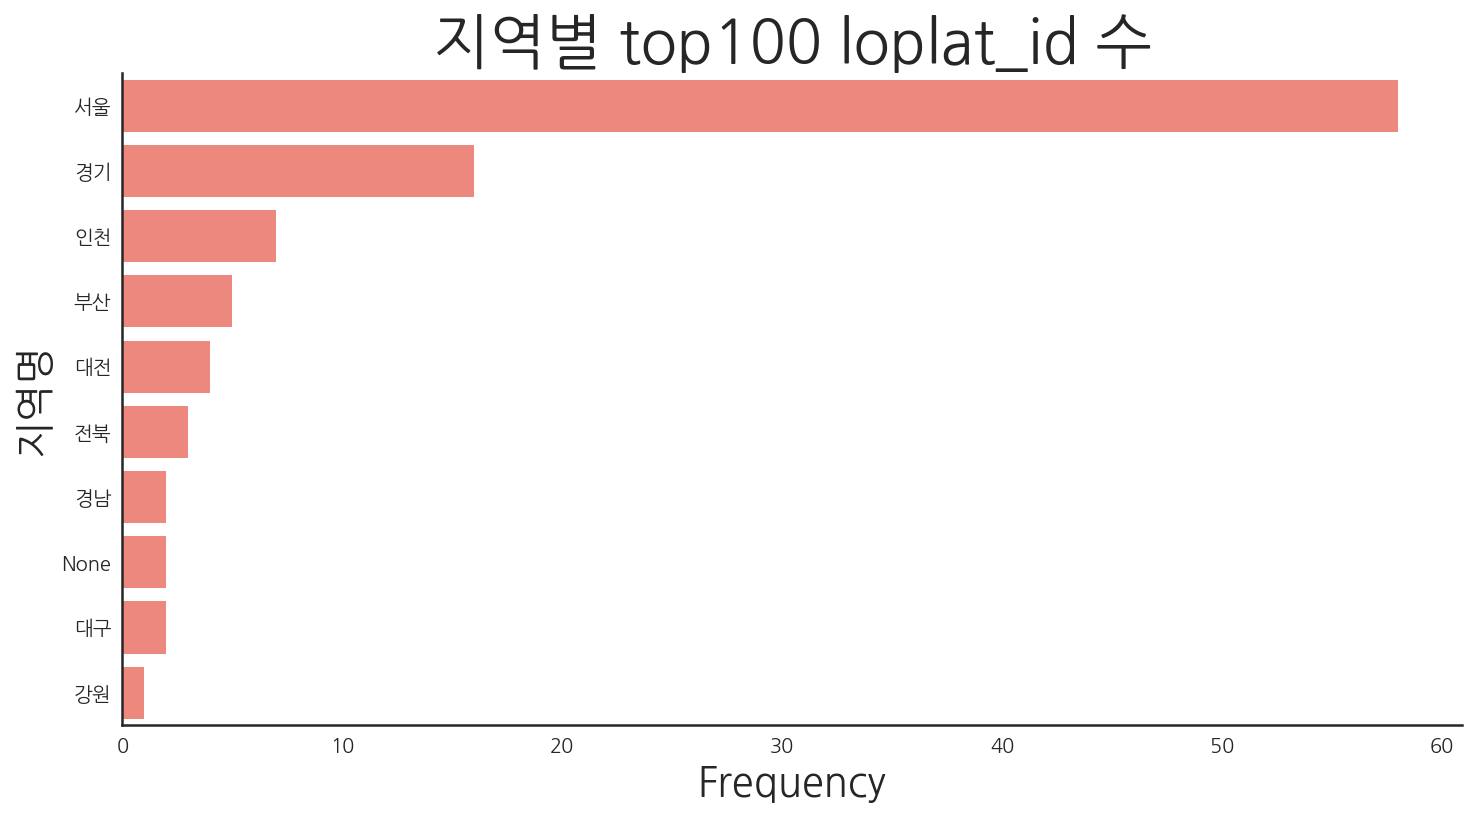

In [125]:
# 역시 서울,경기가 대다수이지만 다른 지역들도 생각보다 많이 보임

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('지역명', fontsize=20)
plt.title('지역별 top100 loplat_id 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=sample_Location_loplat_address.values, y=sample_Location_loplat_address.index,  color='#ff796c')
sns.despine()

plt.show()

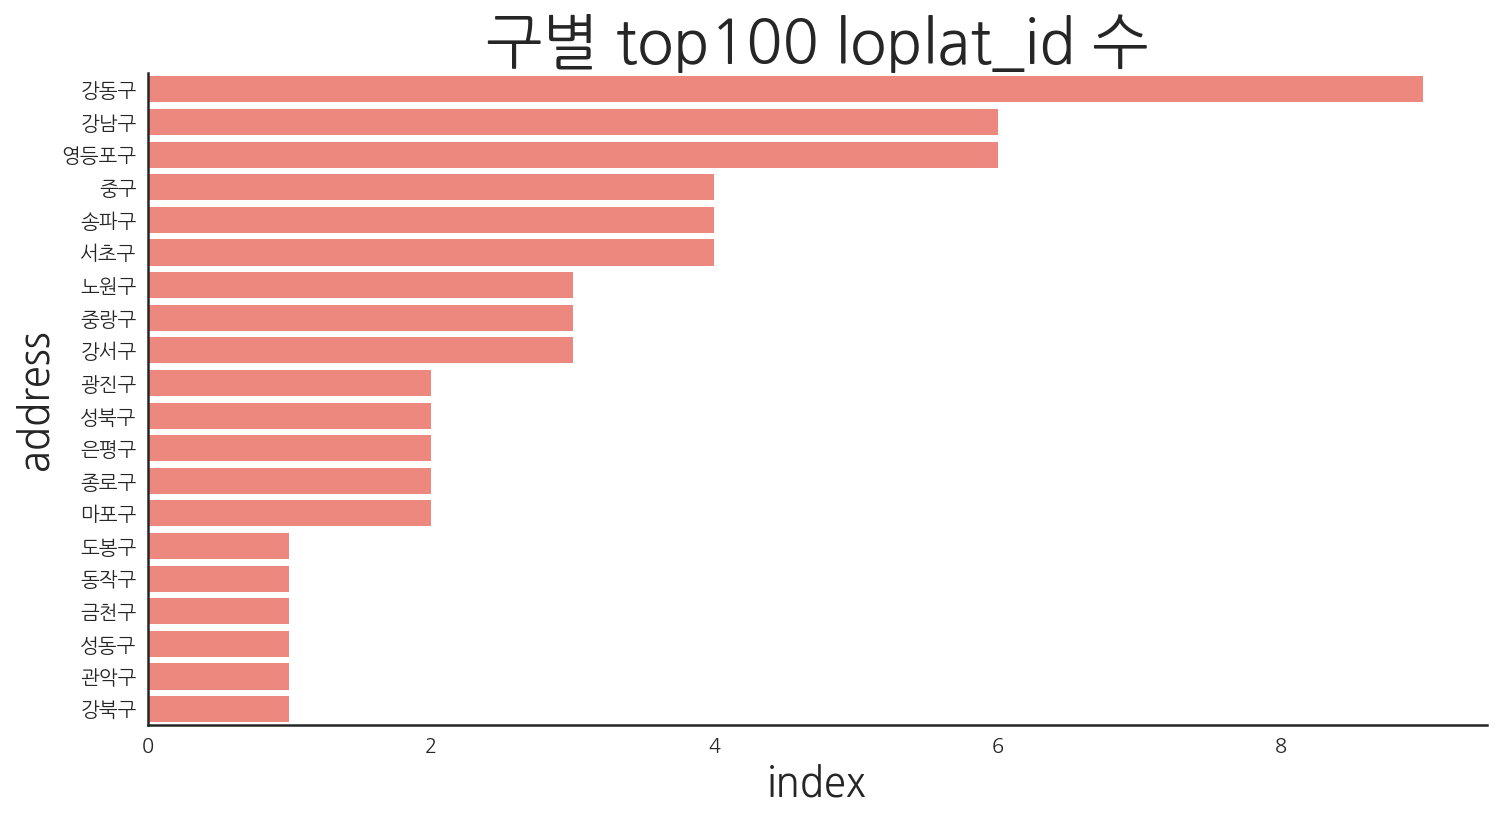

In [147]:
# 서울시만 보면 강동구, 강남구, 영등포구에 핫플레이스가 많은 것으로 확인됨 

sample_Location_popular_loplat['Seoul_or_not'] = sample_Location_popular_loplat['address'].map(lambda x: 1 if '서울' in x else 0)
sample_Location_popular_gu = sample_Location_popular_loplat[lambda x: x.Seoul_or_not == 1]['address'].map(lambda x: x.split(" ")[1]).reset_index().groupby('address').count().sort_values(by='index',ascending=False).reset_index()

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('구', fontsize=20)
plt.title('구별 top100 loplat_id 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='index', y='address', data=sample_Location_popular_gu, color='#ff796c')
sns.despine()

plt.show()

<br>
<br>
<br>
<br>
<br>
# 편의점?
<br>
1. 일정 기간 내에 
2. 해당 매장을 
3. 몇 회 방문했는가?

<br>
편의점은 음... 최소한 일주일에 한번은 가야 자주 간다고 말할 수 있지 않을까?
<br>

In [34]:
sample_Location.head(2)

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 수많은 편의점들....
# 같은 프랜차이즈는 같은 이름으로 처리해주는 전처리 필요

sample_Location[lambda x: x.category == 'Convenience Store']['placename'].value_counts()

GS25                  77228
CU                    56768
세븐일레븐                 43284
미니스톱                  12990
이마트24                  8890
스토리웨이                   524
storyway                364
수협편의점                   348
365PLUS                 279
StoryWay                245
플러스24                   211
편의점                     194
씨스페이스                   142
토마토24                   141
세븐일레븐 인천종합터미널점          111
C SPACE                 106
GS25 대명문화점              102
Story way                98
하프타임                     98
타임스퀘어/GS25               97
스토리웨이 서울역점 2층 A          88
토마토                      87
안드레마트                    84
원타임                      82
CU 아산복합터미널점              76
편의점사랑                    73
스타필드 코엑스몰점/이마트24         66
세븐일레븐 산본롯데피트인점           64
굿바이편의점                   64
ses마트                    63
                      ...  
GS25 S성복역점                1
미니스톱 구리원일점                1
CU 주례럭키점                  1
GS25 옥포주공점                1
세븐일레븐 영주가흥택지사랑점     

In [15]:
location_conv = sample_Location[lambda x: x.category == 'Convenience Store']

In [16]:
len(location_conv)

211015

In [23]:
location_conv['placename_company'] = location_conv['placename'].map(lambda x: 'CU' if 'CU' in str(x)
                                      else 'GS25' if 'GS25' in str(x)
                                      else '세븐일레븐' if '세븐일레븐' in str(x)
                               
                                      else '이마트24' if '이마트24' in str(x)
                                      else '이마트24' if 'emart24' in str(x)
                                      else '이마트24' if 'emart 24' in str(x)
                               
                                      else '미니스톱' if '미니스톱' in str(x)
                               
                                      else '스토리웨이' if '스토리웨이' in str(x)
                                      else '스토리웨이' if 'storyway' in str(x)
                                      else '스토리웨이' if 'StoryWay' in str(x)
                                      else '스토리웨이' if 'Story way' in str(x)

                                      else '수협편의점' if '수협편의점' in str(x)
                                      else '365PLUS' if '365PLUS' in str(x)
                                      else '플러스24' if '플러스24' in str(x)
                               
                                      else '씨스페이스' if 'C SPACE' in str(x)
                                      else '씨스페이스' if '씨스페이스' in str(x)

                                      else '기타'
                              )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
location_conv['placename_company'].value_counts()

GS25       78875
CU         57884
세븐일레븐      44519
미니스톱       13223
이마트24       9814
기타          3991
스토리웨이       1518
수협편의점        348
씨스페이스        313
365PLUS      310
플러스24        220
Name: placename_company, dtype: int64

In [27]:
location_conv.head(2)

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id,placename_company
6,24,2017-09-06 16:49:16.000,P0126873,C SPACE,Near,Convenience Store,부산광역시 금정구 장전3동,1.0,35.232101,129.086917,155422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,씨스페이스
57,153,2017-09-06 18:56:02.000,P0163114,GS25,Near,Convenience Store,서울특별시 동대문구 이문2동,1.0,37.602403,127.062176,109484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GS25


In [26]:
# 편의점 근처라도 간 사람은 총 13657명

location_conv['pid'].nunique()

13657

In [78]:
# 편의점에 실제로 방문한 기록은 5만개
location_conv_in = location_conv[lambda x: x.in_near == 'In']
len(location_conv_in)

57038

In [31]:
# 편의점 안에 한번이라도 들어간 사람은 총 9368명으로 전체 샘플 패널의 약 50%

location_conv_in['pid'].nunique()

9368

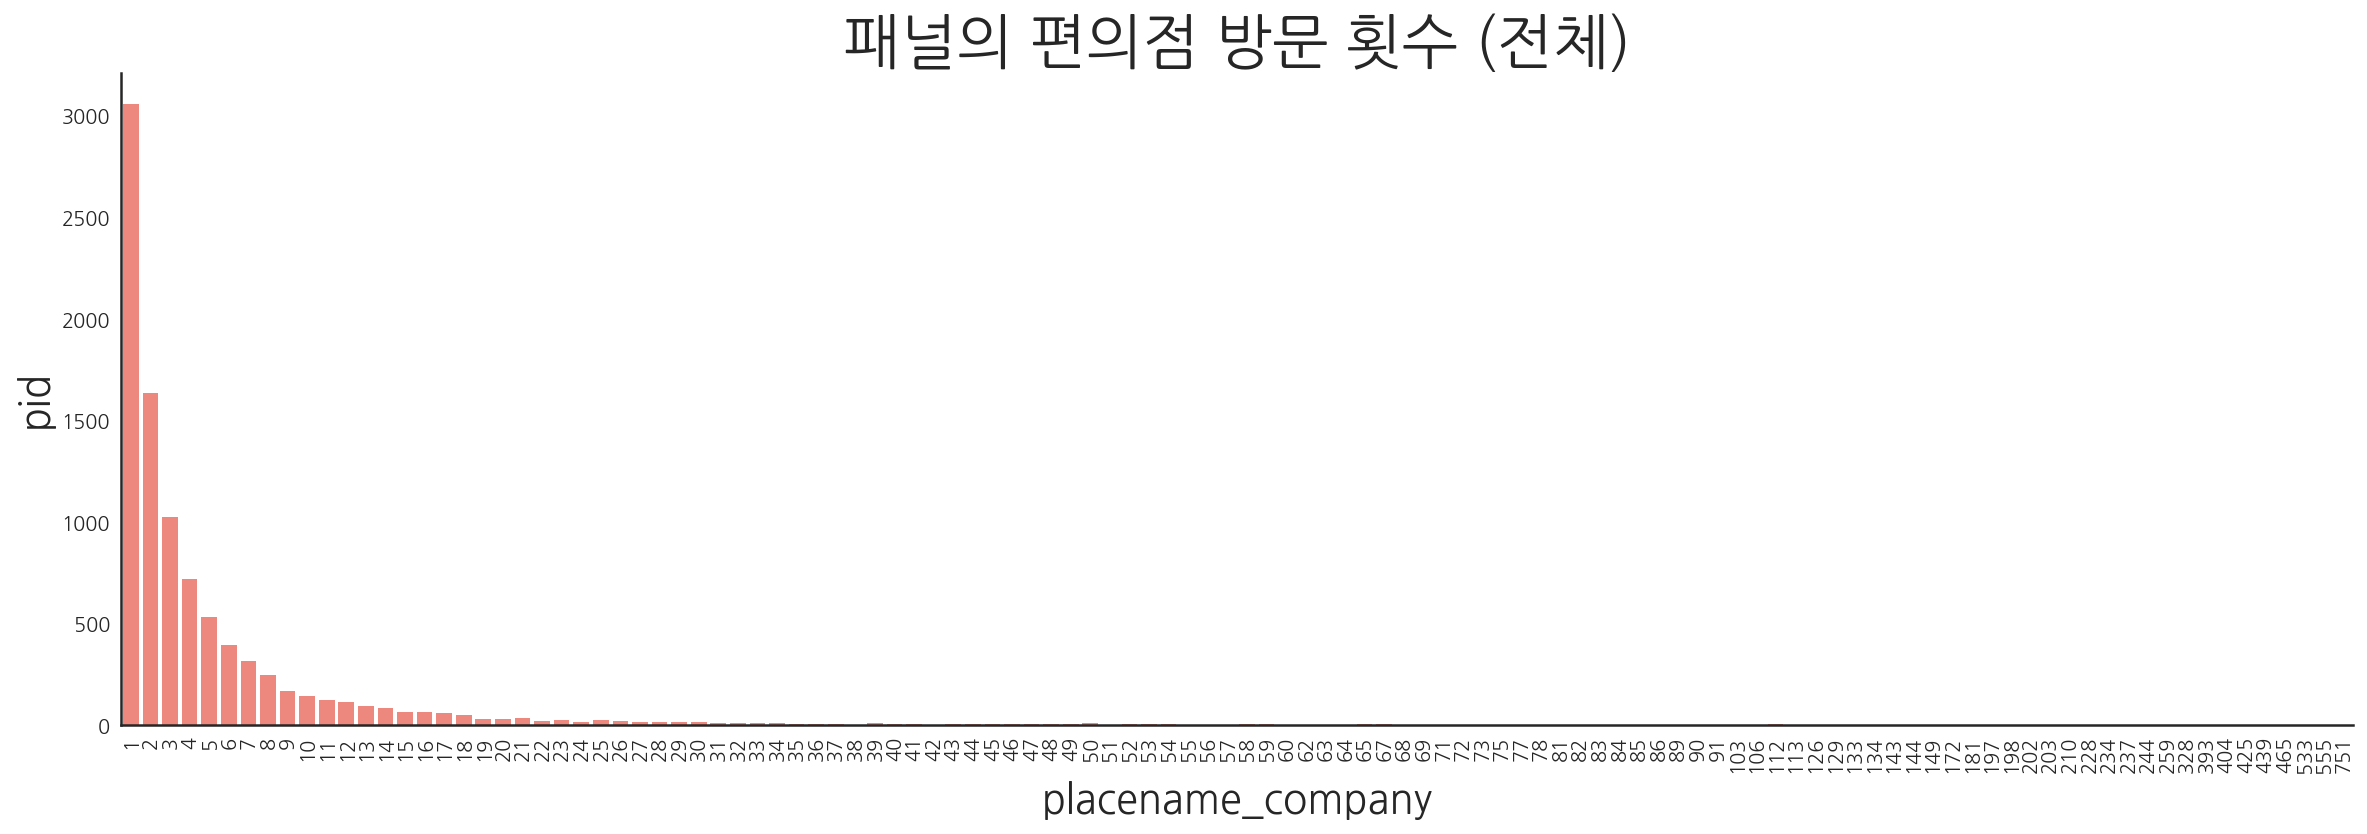

In [39]:
# 전체 편의점에 대하여 보통 1~3회 방문
# 어디든 2번 이상 간 데이터가 잘 없네...

conv_count = location_conv_in.groupby('pid')['placename_company'].count().reset_index().groupby('placename_company').count()

plt.figure(figsize=(20,6))
plt.xlabel('편의점 방문 횟수', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('패널의 편의점 방문 횟수 (전체)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=conv_count.index, y=conv_count['pid'], data=conv_count, color='#ff796c')
sns.despine()

plt.show()

In [40]:
location_conv_in.head(2)

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id,placename_company
359,726,2017-09-07 08:24:29.000,I0592786,세븐일레븐,In,Convenience Store,서울 도봉구 쌍문동 123-74,1.0,37.647057,127.030919,43861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세븐일레븐
424,854,2017-09-07 09:04:01.000,P0051740,미니스톱,In,Convenience Store,서울 마포구 성산동 649-5,1.0,37.557701,126.908881,22402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미니스톱


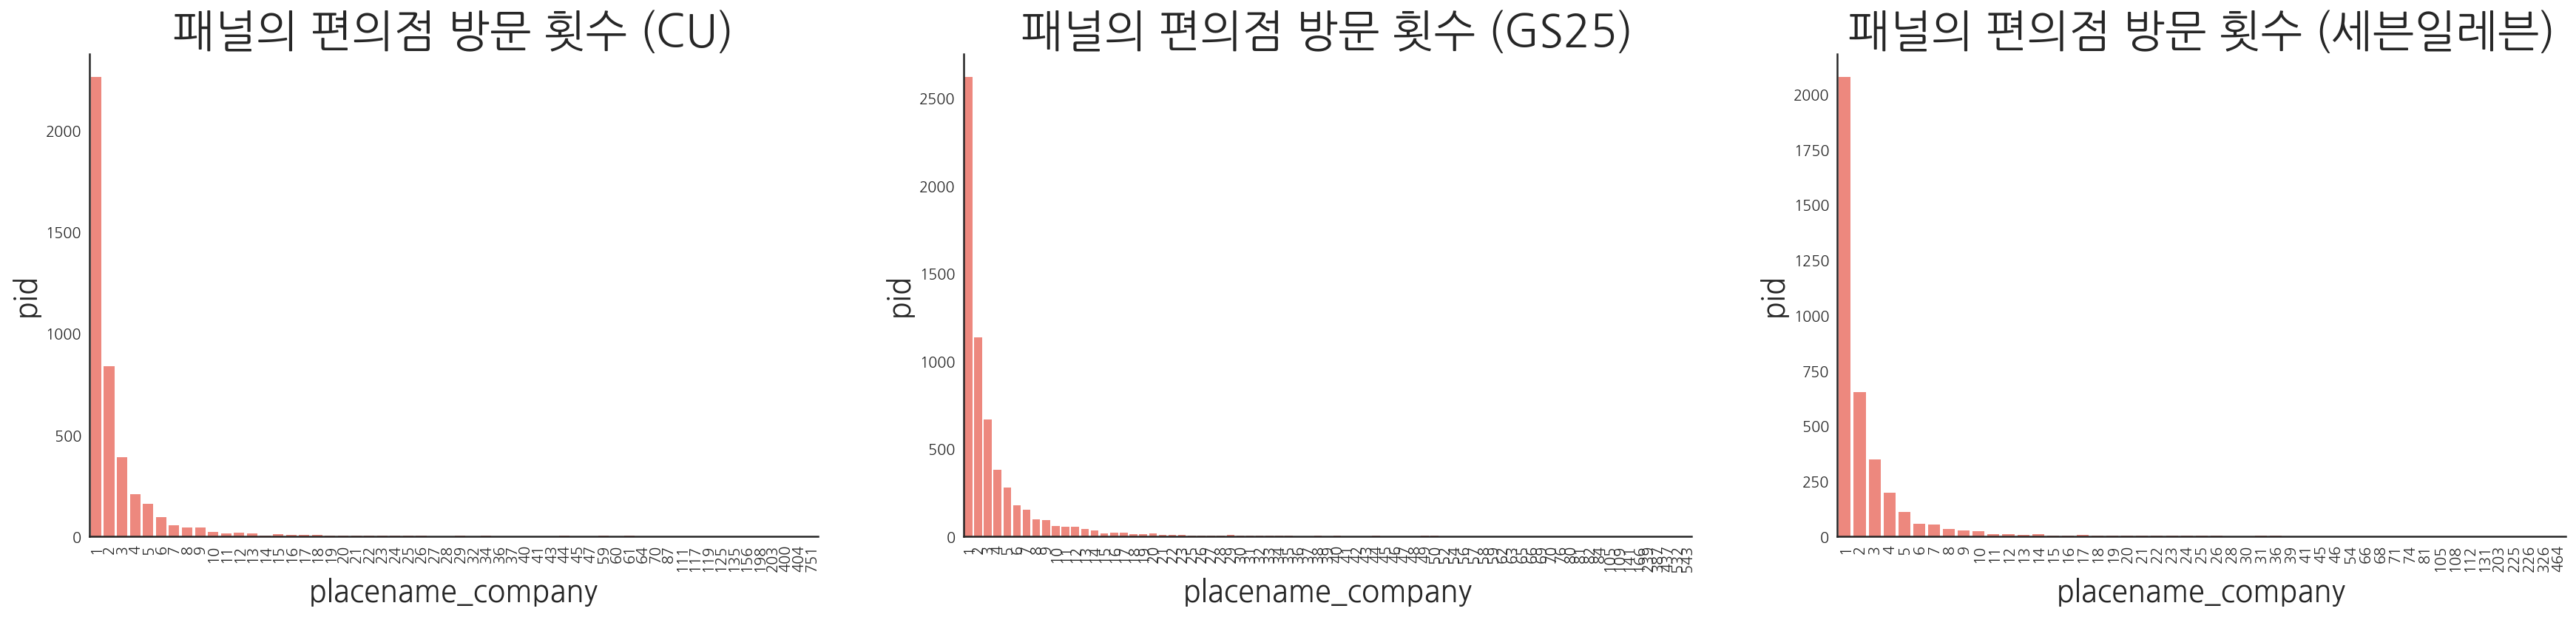

In [44]:
# 대표 프랜차이즈 별로 살펴봐도 마찬가지...
# 기간별로 나누면 일주일에 1회는 커녕....

cu_count = location_conv_in[lambda x: x.placename_company == 'CU'].groupby('pid')['placename_company'].count().reset_index().groupby('placename_company').count()
gs_count = location_conv_in[lambda x: x.placename_company == 'GS25'].groupby('pid')['placename_company'].count().reset_index().groupby('placename_company').count()
sev_count = location_conv_in[lambda x: x.placename_company == '세븐일레븐'].groupby('pid')['placename_company'].count().reset_index().groupby('placename_company').count()


plt.figure(figsize=(30,6))

plt.subplot(131)
plt.xlabel('편의점 방문 횟수', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('패널의 편의점 방문 횟수 (CU)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.barplot(x=cu_count.index, y=cu_count['pid'], data=cu_count, color='#ff796c')
sns.despine()

plt.subplot(132)
plt.xlabel('편의점 방문 횟수', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('패널의 편의점 방문 횟수 (GS25)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.barplot(x=gs_count.index, y=gs_count['pid'], data=gs_count, color='#ff796c')
sns.despine()

plt.subplot(133)
plt.xlabel('편의점 방문 횟수', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('패널의 편의점 방문 횟수 (세븐일레븐)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.barplot(x=sev_count.index, y=sev_count['pid'], data=sev_count, color='#ff796c')
sns.despine()

plt.show()

In [79]:
# 개인의 데이터 수집 기간에 맞춰 편의점 방문 빈도를 보자 (각자 수집기간이 다른 것에 따른 정규화)
# 적어도 1주일에 한번 편의점을 간 사람이 몇 명이나 있을까?

strptime_diff = sample_Location_strptime.reset_index()[['pid','diff']]
location_conv_in = location_conv_in.merge(strptime_diff, how='inner', on='pid' )

conv_diff = location_conv_in.groupby(['pid','diff'])['placename_company'].count().reset_index()
conv_diff['diff_week'] = conv_diff['diff'].map(lambda x: (int(x)//7)+1)
conv_diff['visit_ratio'] = round(conv_diff['placename_company']/conv_diff['diff_week'],1)

In [81]:
conv_diff_count = conv_diff.groupby('visit_ratio')['pid'].count()

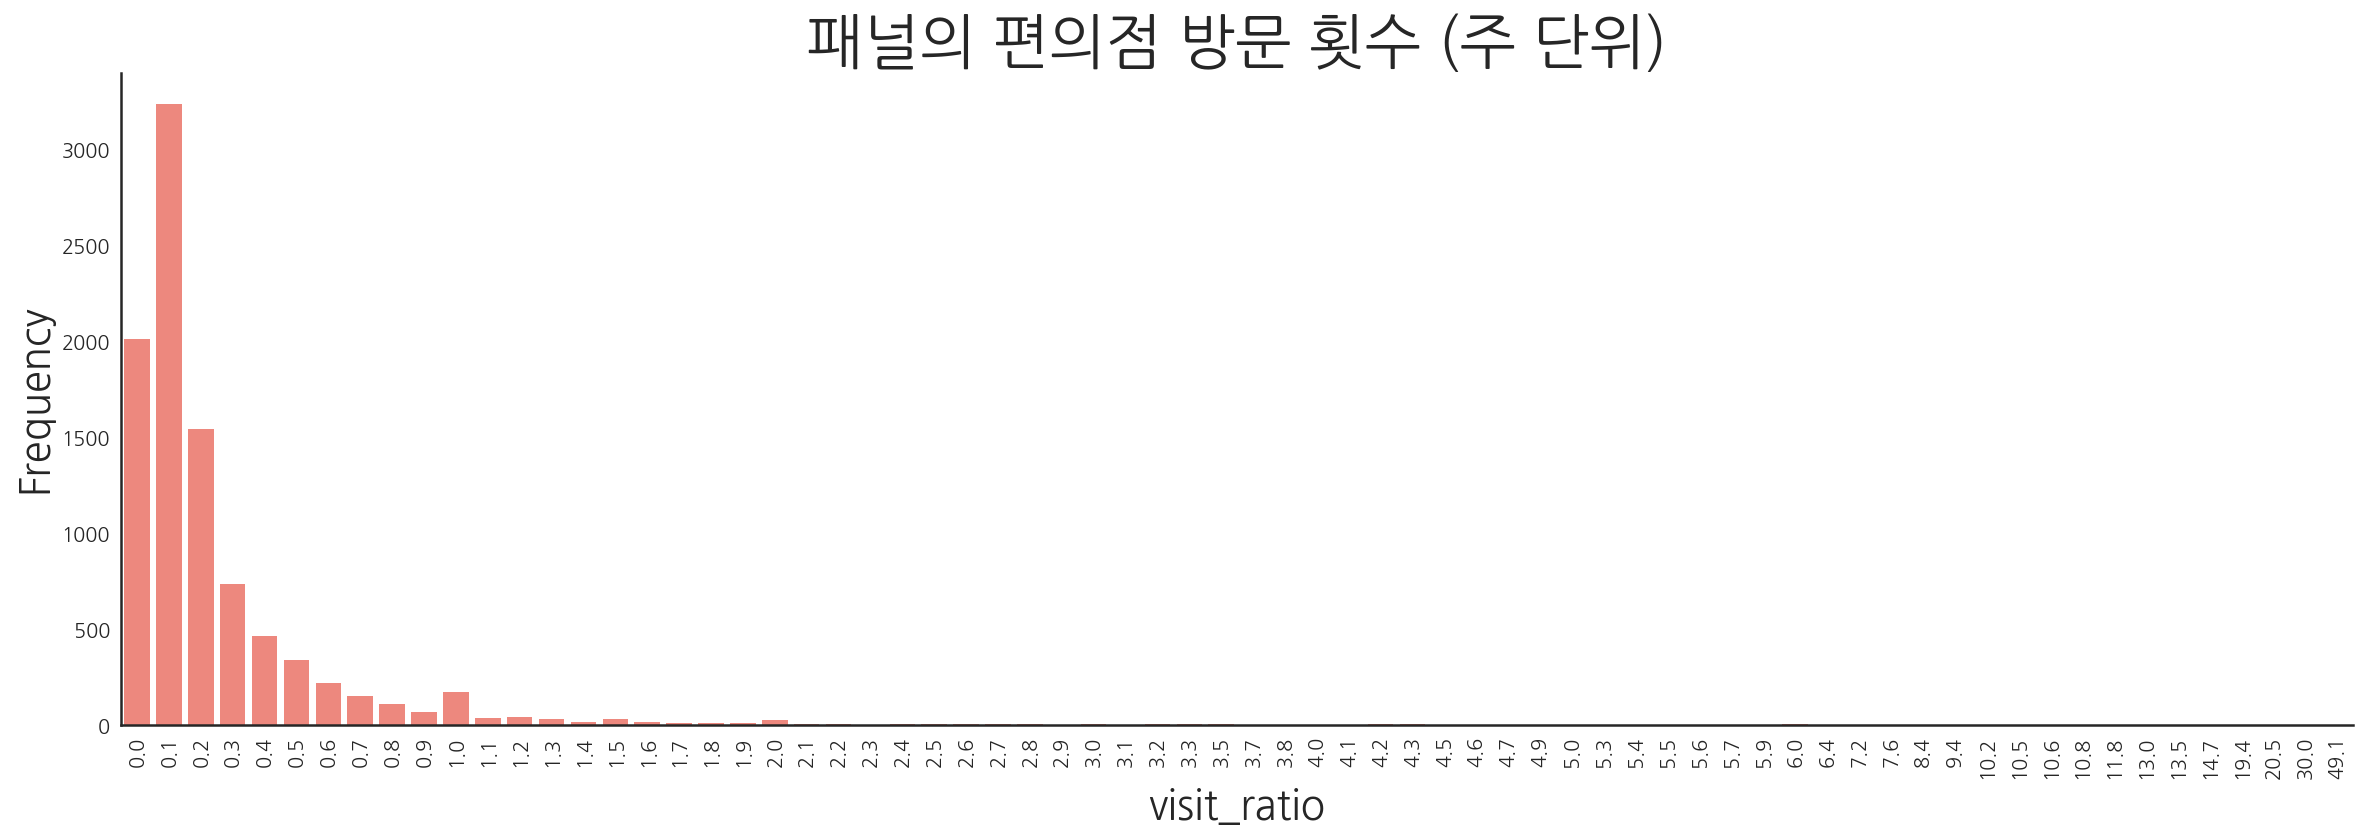

In [83]:
# 1주일에 1회 이상 방문한 사람은 매우 적음

plt.figure(figsize=(20,6))
plt.xlabel('편의점 방문 횟수 (주 단위)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('패널의 편의점 방문 횟수 (주 단위)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=conv_diff_count.index, y=conv_diff_count.values, color='#ff796c')
sns.despine()

plt.show()

In [88]:
# 전체 패널 중 고작 500명... 전체의 약 2.7% 정도

len(conv_diff[lambda x: x.visit_ratio >= 1])

499

In [90]:
# 2주에 1번 이상 간 사람은 1383명... 전체의 약 7.5%
# 이 정도가 편의점 진성 고객 기준으로 그나마 맞는 듯

len(conv_diff[lambda x: x.visit_ratio >= 0.5])

1383

In [94]:
conv_loyal_list = list(conv_diff[lambda x: x.visit_ratio >= 0.5]['pid'].unique())
location_conv_in_loyal = location_conv_in[lambda x: x.pid.isin( conv_loyal_list)]
location_conv_in_loyal['major_conv'] = location_conv_in_loyal['placename_company'].map(
                                            lambda x: x if ((x == 'CU')|(x == 'GS25')|(x=='세븐일레븐')) else '기타편의점')

In [157]:
loyal_major_count = location_conv_in_loyal.groupby(['pid','major_conv'])['idx'].count().reset_index()

lmc_demo = pd.DataFrame(loyal_major_count['pid'].unique())
lmc_demo = pd.concat([lmc_demo,lmc_demo,lmc_demo,lmc_demo])
lmc_demo['major_conv'] = ('CU.'*1383 + 'GS25.'*1383 + '세븐일레븐.'*1383 + '기타편의점.'*1383).split('.')[:-1]
lmc_demo.columns = ['pid','major_conv']

lmc = lmc_demo.merge(loyal_major_count, how='left', on=['pid','major_conv'])
lmc = lmc.fillna(0)

lmc_sum = lmc.groupby('pid')['idx'].sum().reset_index()
lmc_sum.columns = ['pid', 'sum']
lmc = lmc.merge(lmc_sum, how='left', on='pid')
lmc['major_visit_ratio'] = (lmc['idx']/lmc['sum'])*100

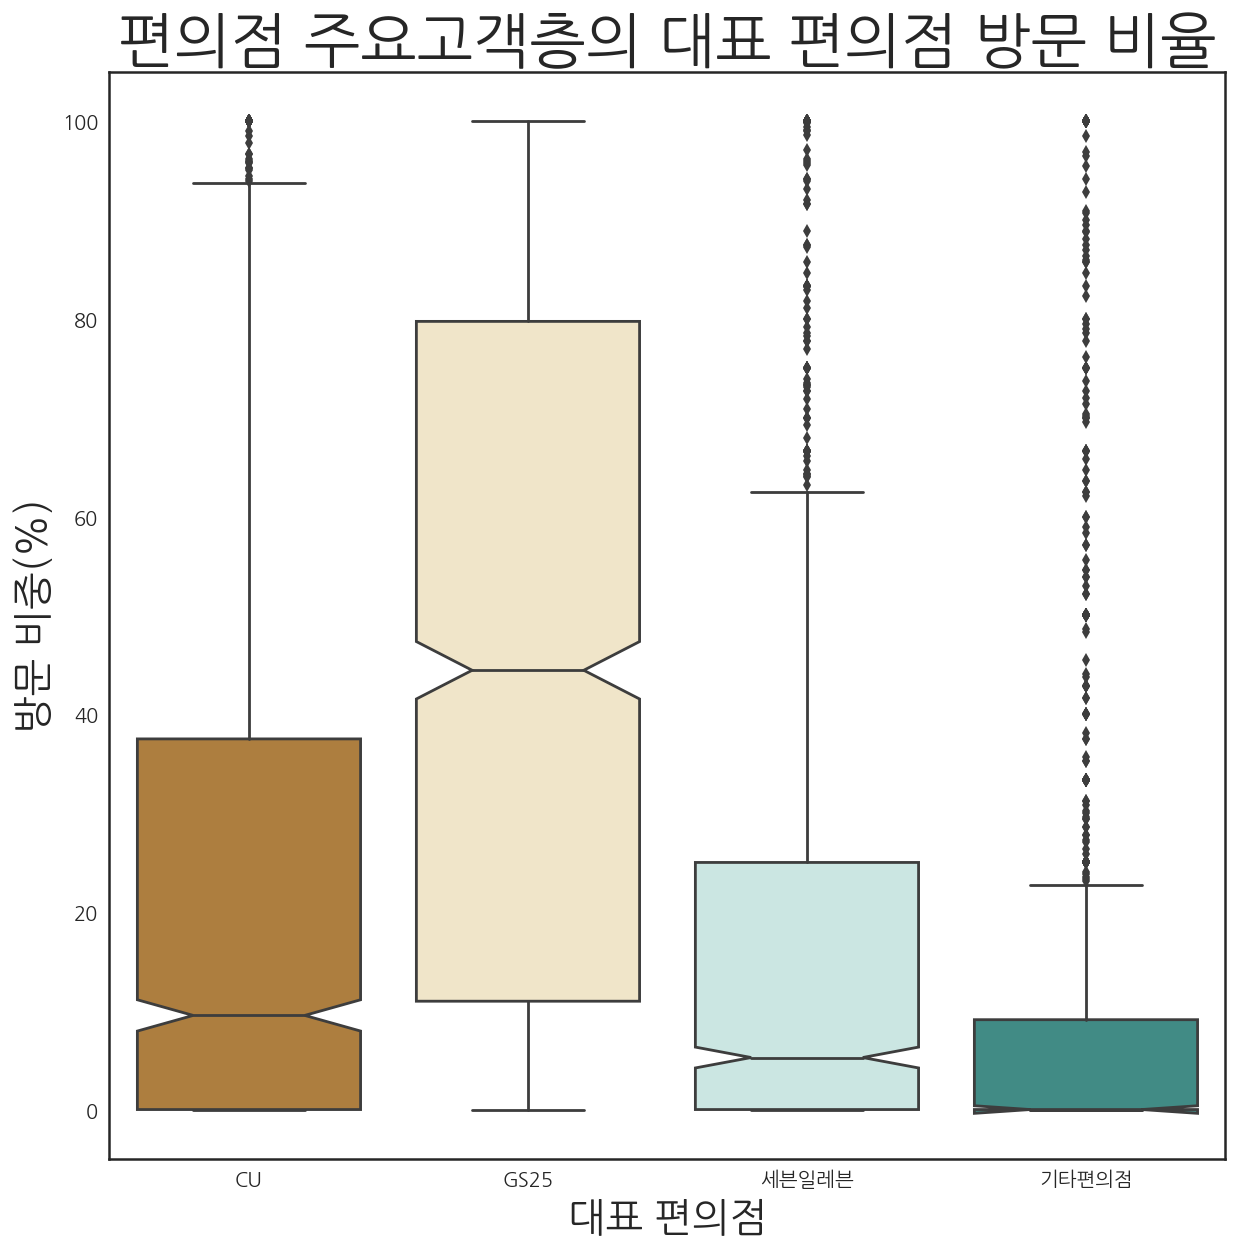

In [167]:
# 주로 GS를 가고, 씨유와 세븐일레븐이 또이또이 하지만 어쨌든 어느 매장이든 충성도 높은 고객은 존재

plt.figure(figsize=(10,10))

pal1 = sns.color_palette("BrBG", 4)
sns.boxplot(x = 'major_conv', y = 'major_visit_ratio', data = lmc, palette=pal1 ,notch = True )
plt.xlabel('대표 편의점', fontsize=20)
plt.ylabel('방문 비중(%)', fontsize=20)
plt.title('편의점 주요고객층의 대표 편의점 방문 비율', fontsize=30)

plt.show()

<br>
<br>
<br>
<br>

# sample_AppUsage

---

In [148]:
sample_AppUsage_usage_app_list.head()

,panel_id,package_name,app_name,reg_date
0,H0066345,com.android.vpndialogs,VpnDialogs,2017-12-25 13:44:20.633
1,H0066345,com.samsung.dcmservice,com.samsung.dcmservice,2017-12-25 13:44:20.633
2,H0066345,com.skt.skaf.OA00018282,ONE store service,2017-12-25 13:44:20.633
3,H0066345,com.android.phone,전화,2017-12-25 13:44:20.633
4,H0066345,com.android.shell,셸,2017-12-25 13:44:20.633


In [153]:
# 총 2,977,761개의 데이터

len(sample_AppUsage_usage_app_list)

2977761

In [149]:
# 패널 수는 역시 18463명으로 누락된 패널 없음

sample_AppUsage_usage_app_list['panel_id'].nunique()

18463

In [150]:
# 무시할만한 수준의 결측치

sample_AppUsage_usage_app_list.isnull().sum()

panel_id        0
package_name    0
app_name        6
reg_date        0
dtype: int64

In [154]:
# 결측치 있는 row 제거

sample_AppUsage_usage_app_list = sample_AppUsage_usage_app_list.dropna()

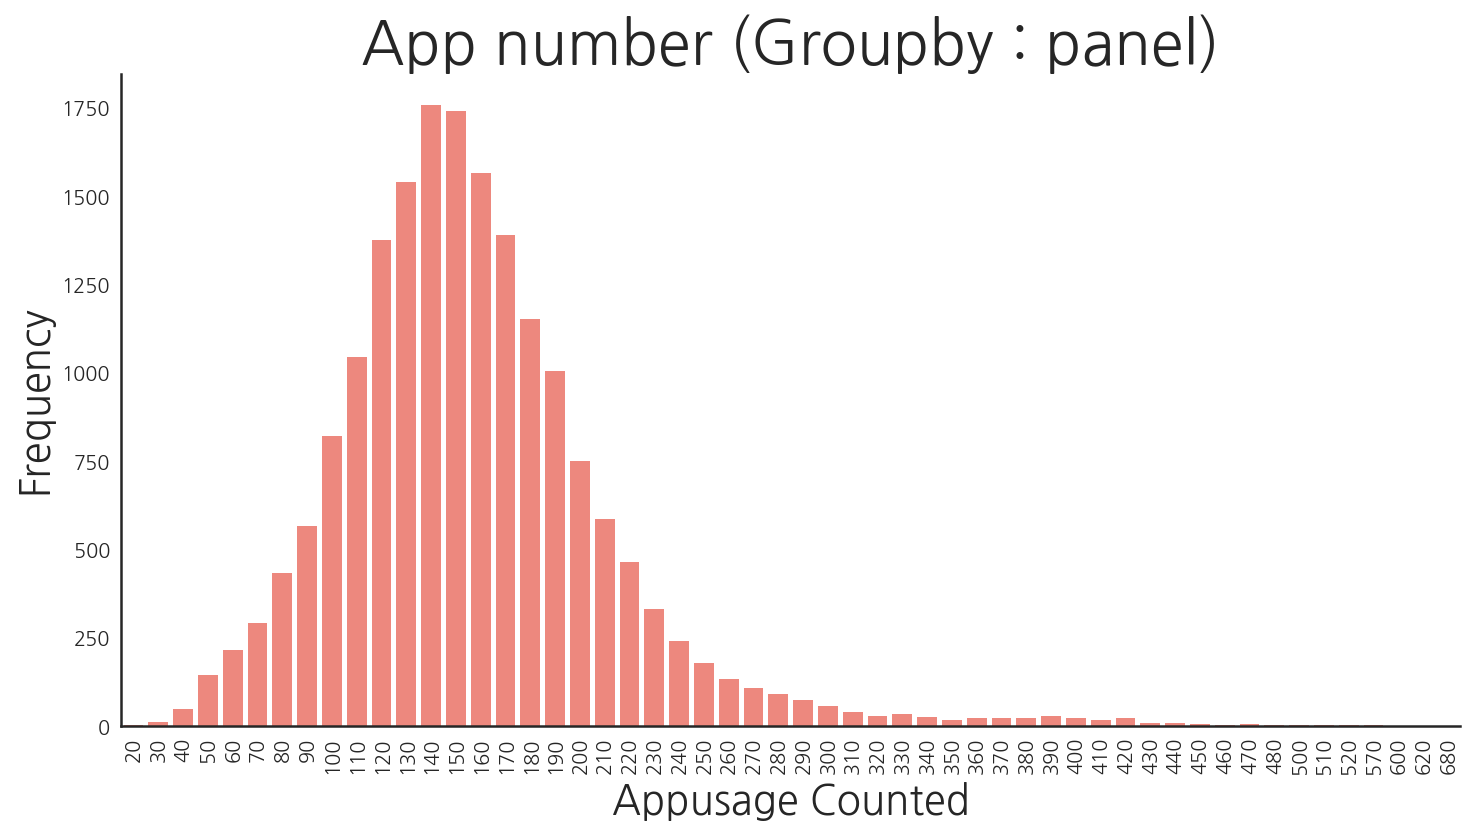

In [155]:
# 패널당 평균적으로 약 150개 정도의 app이 관찰되는 것을 확인

sample_AppUsage_count = sample_AppUsage_usage_app_list['panel_id'].value_counts().map(lambda x: x//10*10).value_counts()

plt.figure(figsize=(12,6))
plt.xlabel('Appusage Counted', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('App number (Groupby : panel)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=sample_AppUsage_count.index, y=sample_AppUsage_count.values,  color='#ff796c')
sns.despine()

plt.show()

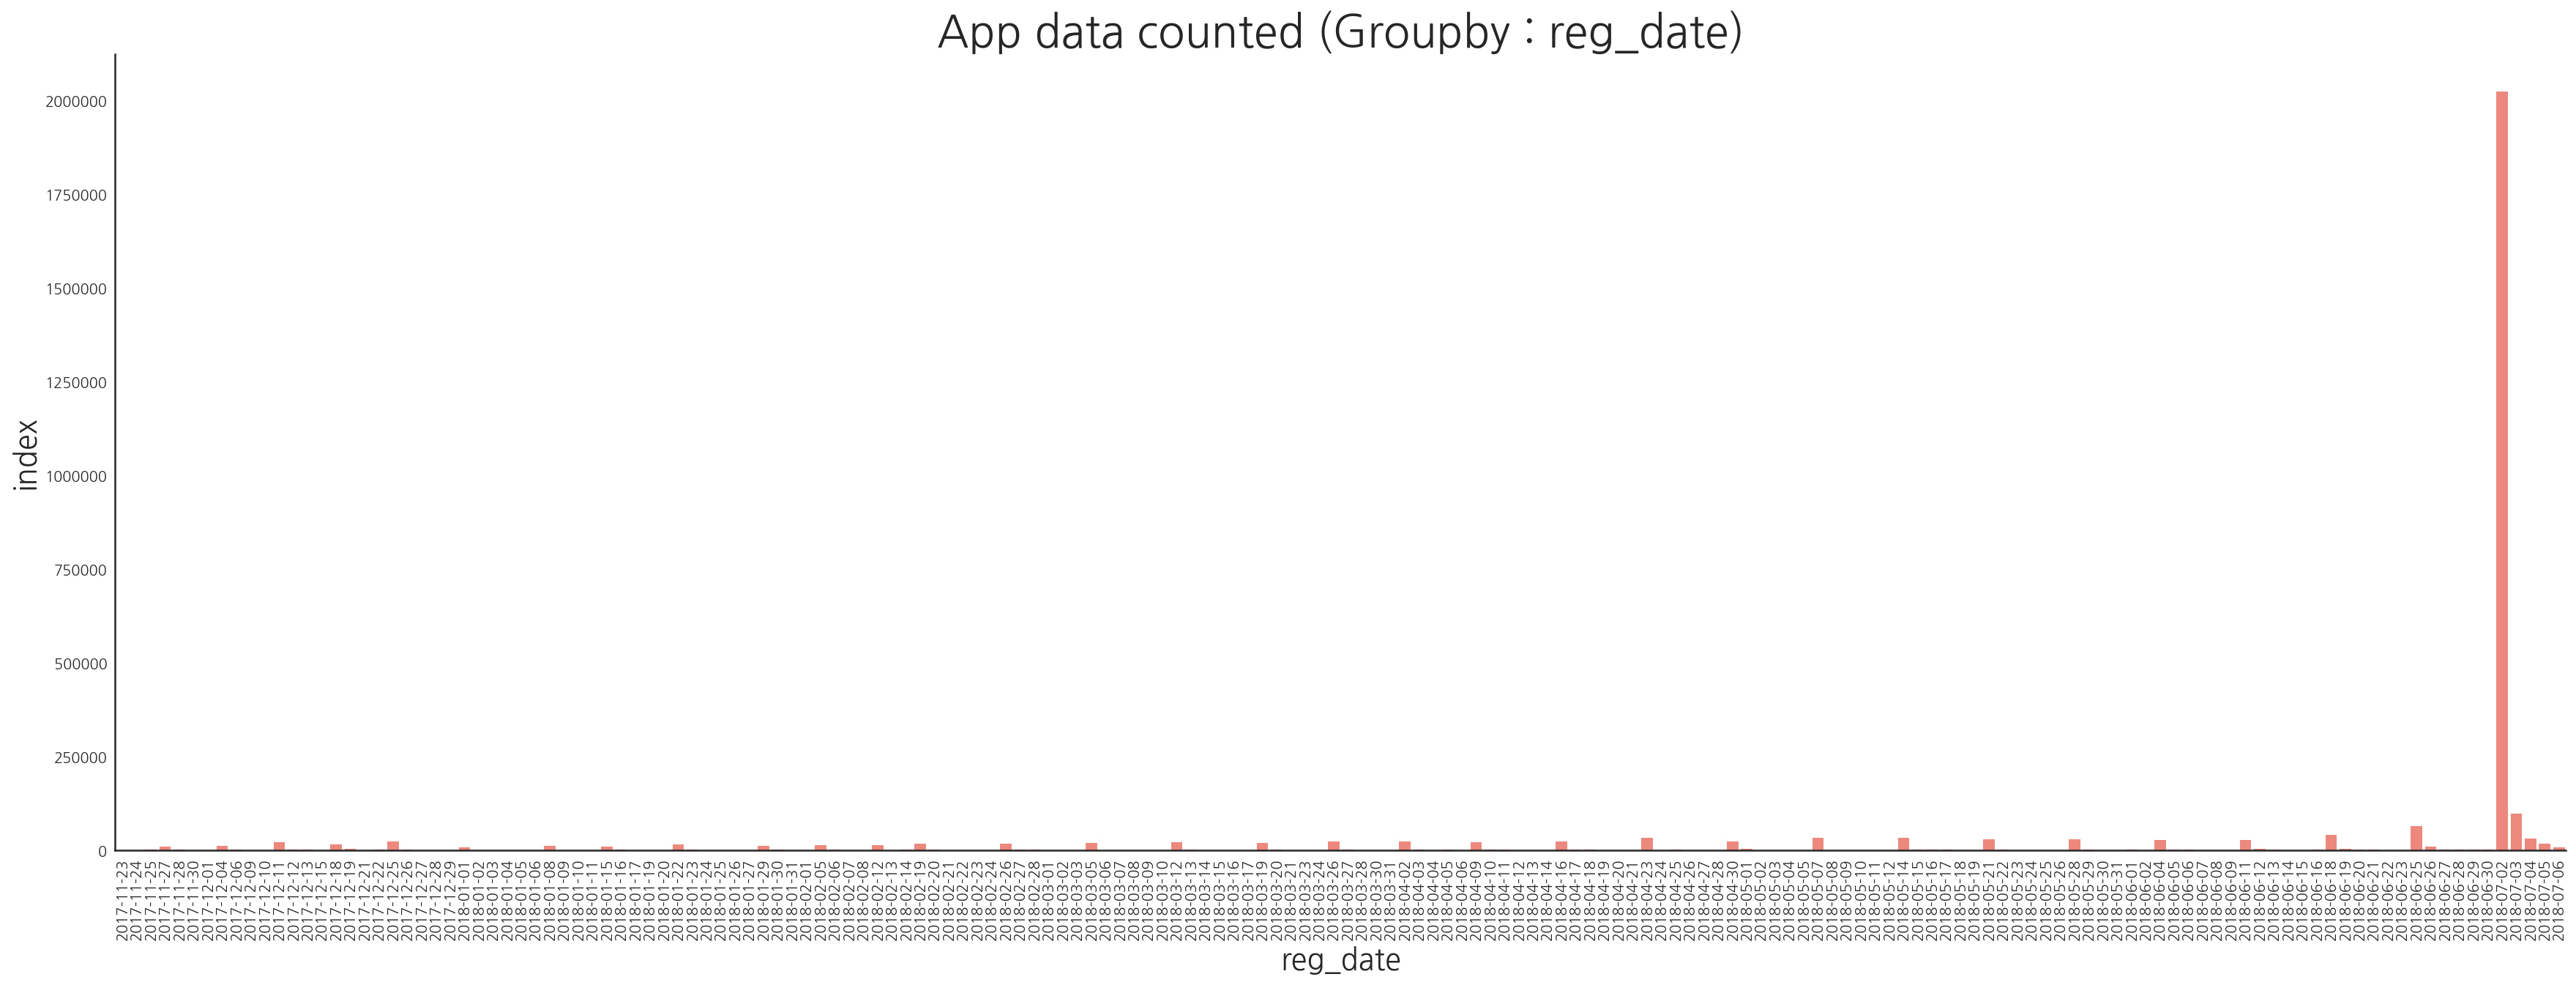

In [156]:
# 많은 양의 데이터가 7월 2일에 수집된 것을 확인, 그러나 다른 날에 데이터가 수집된 패널도 다수 존재

sample_AppUsage_date = sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
sample_AppUsage_date_df = sample_AppUsage_date.reset_index().groupby('reg_date').count()
sample_AppUsage_date_df = sample_AppUsage_date_df.reset_index()
sample_AppUsage_date_df['reg_date'] = sample_AppUsage_date_df['reg_date'].map(lambda x: str(x)[:10])

plt.figure(figsize=(30,10))
plt.xlabel('Appusage Counted', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.title('App data counted (Groupby : reg_date)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x='reg_date', y='index', data=sample_AppUsage_date_df,  color='#ff796c')
sns.despine()

plt.show()

In [157]:
# 7월 2일에 67%의 데이터가 수집됨

sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10]).value_counts()[0] / len(sample_AppUsage_usage_app_list['reg_date'])

0.6796482585034699

In [158]:
# 패널들의 앱 데이터는 어쨌든 각 개인에 한하여 '같은 시점'에 수집된 것임을 알 수 있음
# 그러나 각 패널 간 수집된 날짜는 각각 다름
# 패널간 등록 일시 (reg_date)에 차이가 있는 이유는 무엇이고, 왜 약 67%의 패널의 데이터가 7월 2일에 수집되었을까?

sample_AppUsage_usage_app_list['reg_date'] = sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10])
sample_AppUsage_usage_app_list.groupby('panel_id')['reg_date'].nunique().value_counts()

1    18463
Name: reg_date, dtype: int64

In [159]:
# 총 50323개의 앱 관찰

sample_AppUsage_usage_app_list['app_name'].nunique()

50323

In [160]:
dict_app_name_modified = {'패널파워': 18498,
 'YouTube': 18477,
 'Chrome': 18456,
 'Gmail': 18446,
 '카카오톡': 17945,
 'Google': 17799,
 'AhnLab V3 Mobile Plus 2.0': 17489,
 'NAVER': 14891,
 'OK Cashbag': 11682,
 'Samsung Pay': 11473,
 'Samsung Location SDK': 11452,
 'Excel': 9899,
 '삼성 프린트 서비스 플러그인': 9805,
 'Syrup 월렛': 9694,
 'PowerPoint': 9650,
 'OneDrive': 9596,
 'Word': 9569,
 'Samsung Health': 9491,
 '11번가': 9386,
 'BAND': 9218,
 '모바일 T world': 9124,
 '삼성 계정': 9114,
 'T전화': 9028,
 'Instagram': 8972,
 'Facebook': 8789,
 'Always On Display': 8442,
 '해피포인트': 8291,
 '네이버 지도': 8229,
 'ISP/페이북': 7852,
 'T멤버십': 7726,
 '카카오스토리': 7180,
 '네이버 카페': 7088,
 '네이버 클라우드': 7082,
 'KB스타뱅킹': 7054,
 'ONE store Setup Wizard': 7053,
 '위메프': 7023,
 '카카오 T': 6942,
 'Samsung Gear': 6882,
 '쿠팡': 6664,
 'G마켓': 6514,
 'L.POINT': 6498,
 '티몬': 6456,
 '카카오뱅크': 6407,
 'CJ ONE': 6216,
 'Melon': 6178,
 'Duo': 6165,
 'NH뱅킹': 5712,
 'oksusu': 5665,
 '코레일톡': 5649,
 'SNOW': 5583,
 '신한 FAN (앱카드)': 5534,
 '배달의민족': 5532,
 'CGV': 5459,
 '후후': 5332,
 '신한 쏠(SOL)': 5251,
 'OneNote': 5229,
 '네이버 웹툰': 5094,
 '원터치개인': 5055,
 '다음': 5023,
 '하나멤버스': 4844,
 'PAYCO': 4840,
 '옥션': 4828,
 '카카오페이지': 4788,
 '토스': 4687,
 '네이버TV': 4569,
 '틸리언': 4530,
 'Google VR 서비스': 4522,
 '컬쳐랜드': 4451,
 'KEB 하나은행': 4387,
 'KT 멤버십': 4364,
 '캐시슬라이드': 4342,
 'U+ 고객센터': 4329,
 '알약M': 4317,
 '캐시워크': 4273,
 '카카오맵': 4089,
 '네이트': 3978,
 'GS SHOP': 3927,
 'Google Play 북': 3921,
 '패널나우': 3875,
 '지니 뮤직': 3869,
 '비디오포털': 3802,
 '리브메이트': 3798,
 '한컴오피스 viewer': 3678,
 '스타벅스': 3654,
 '신한카드': 3632,
 '오베이': 3627,
 '라임': 3609,
 'CJmall': 3601,
 '나만의냉장고': 3474,
 'KB국민카드': 3316,
 '올레 tv 모바일': 3309,
 'i-ONE뱅크': 3301,
 '클라우드베리': 3243,
 '알바몬': 3226,
 '배달요기요': 3201,
 'S노트': 3189,
 '롯데시네마': 3164,
 'Papago': 3104,
 '롯데홈쇼핑': 3073,
 '카카오버스': 3069,
 '네이버 블로그': 3049,
 '홈&쇼핑': 3029,
 '삼성카드': 2995,
 '인터파크': 2962,
 '서베이링크': 2954,
 '지하철종결자': 2912,
 '카카오톡 치즈': 2907,
 '모바일 티머니': 2907,
 '기프티콘': 2897,
 '이디야멤버스': 2873,
 'FaceProvider': 2865,
 '현대Hmall': 2852,
 'KB스타알림': 2778}

In [161]:
Series_app_name_modified = pd.Series(dict_app_name_modified)

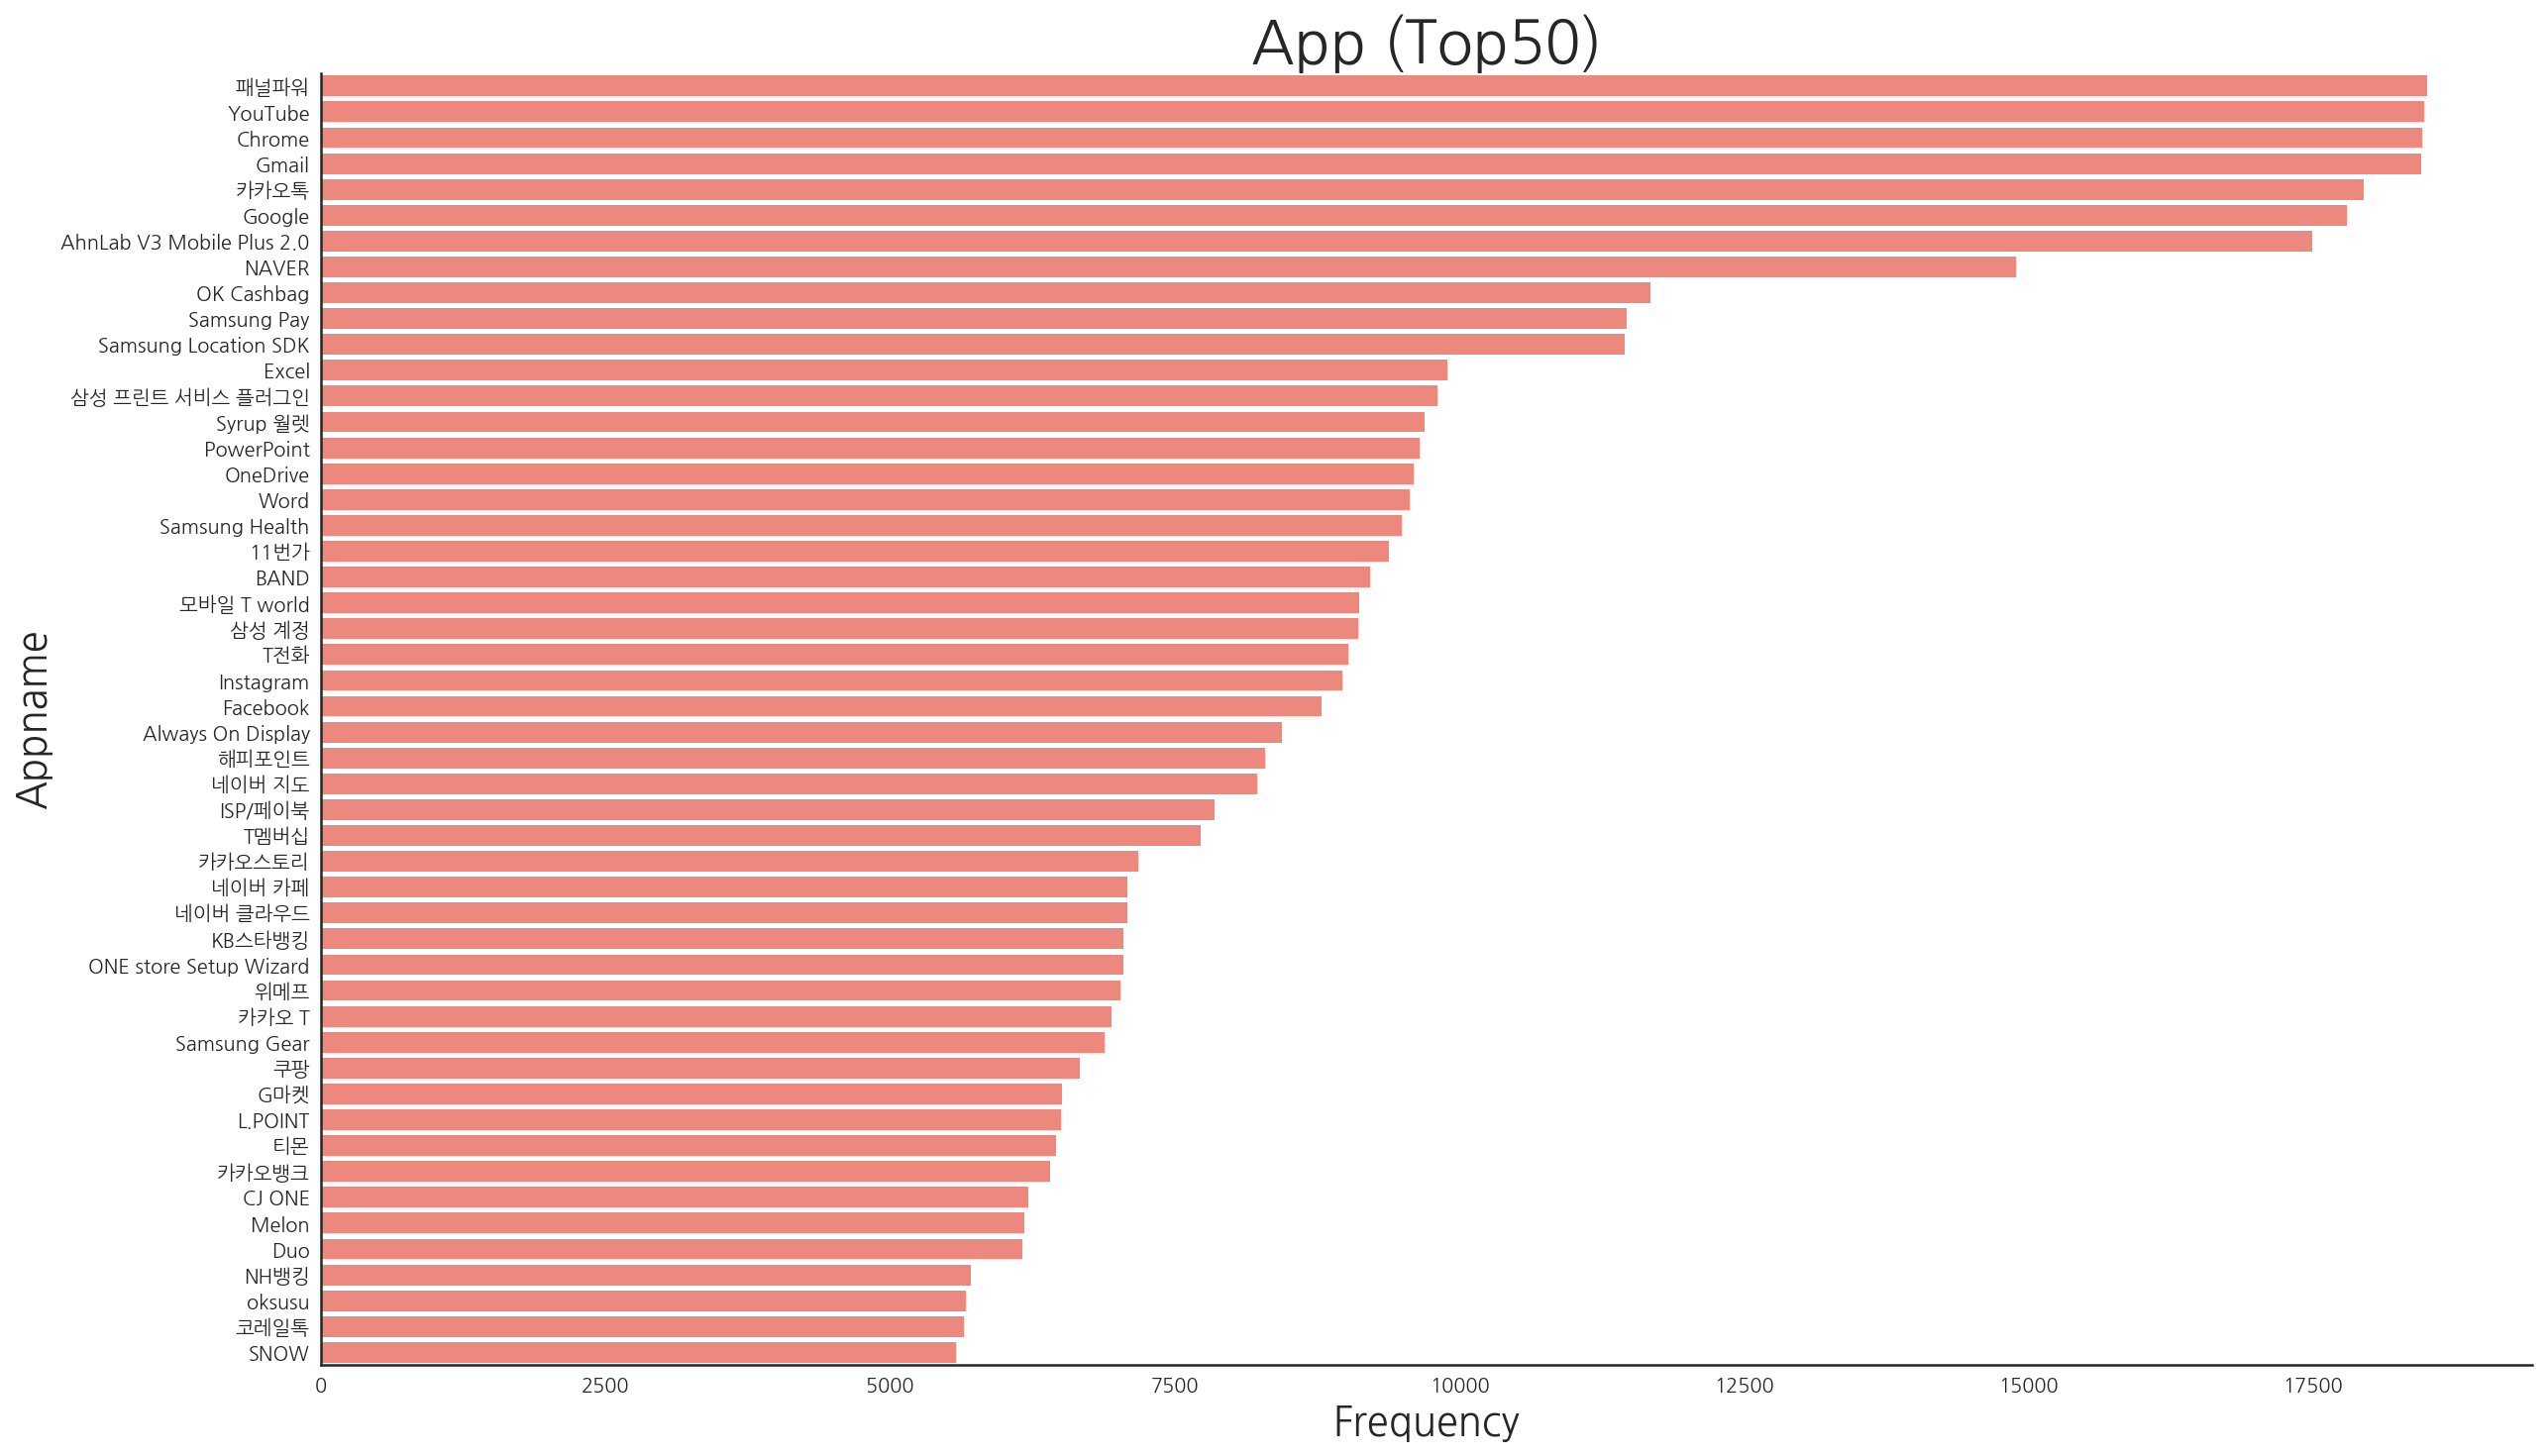

In [162]:
# 많이 사용된 앱 중 기본 내장 어플을 주관적으로 삭제하고 남은 앱 중 상위 50개
# 네이버, 카카오 관련 앱이 많이 보임

app_top_50 = Series_app_name_modified.head(50)

plt.figure(figsize=(20,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Appname', fontsize=20)
plt.title('App (Top50)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=app_top_50.values, y=app_top_50.index,  color='#ff796c')
sns.despine()

plt.show()

<br>
<br>
<br>
<br>

# sample_AppUsage_usage_sum_time

---

In [5]:
sample_AppUsage_usage_sum_time.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date
0,A0000910,10,cn.wps.moffice_eng,WPS Office,생산성,0.0,0,2017-11-25 11:01:48.930000000
1,A0000910,10,com.adobe.reader,Adobe Acrobat,생산성,0.0,0,2017-11-25 11:01:48.930000000
2,A0000910,10,com.ahnlab.v3mobileplus,AhnLab V3 Mobile Plus 2.0,도구,0.0,00:00:00,2017-11-25 11:01:48.920000000
3,A0000910,10,com.android.chrome,Chrome,커뮤니케이션,0.0,0,2017-11-25 11:01:48.930000000
4,A0000910,10,com.bravolang.dictionary.korean,사전,NaN,0.0,0,2017-11-25 11:01:48.930000000


In [6]:
# 56,299,744개의 데이터

len(sample_AppUsage_usage_sum_time)

56299744

In [7]:
# 결측치 확인
# reg_cnt는 수집된 기록차수 (각 개인당 몇번째로 수집된 기록인지)

sample_AppUsage_usage_sum_time.isnull().sum()

panel_id                  0
reg_cnt               29440
package_name              0
app_name                109
app_category        4434441
total_time_stamp    1034394
total_time          1034394
reg_date            1034394
dtype: int64

In [9]:
# 일단 데이터 크기를 줄이고자 사용시간이 0이거나 Null인 앱 사용기록을 모두 지움

usage_sum_time_notzero = sample_AppUsage_usage_sum_time[lambda x: x.total_time != '0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time != '00:00:00' ]
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time !=  '0:0:0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time.notnull()]

In [10]:
# 약 1378만 row로 데이터 수가 많이 줄어들게 됨!

len(usage_sum_time_notzero)

13872764

In [11]:
# 다시 결측치 확인
# app_name 결측치 30개만 지워주면 될 듯 하다.

usage_sum_time_notzero.isnull().sum()

panel_id                 0
reg_cnt                  0
package_name             0
app_name                30
app_category        795196
total_time_stamp         0
total_time               0
reg_date                 0
dtype: int64

In [12]:
# app_name 결측치, panel_id 이상한거 처리하기

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.app_name.notnull()]

panel_id_list = list(sample_AppUsage_usage_app_list['panel_id'].unique())
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.panel_id.isin(panel_id_list)]

In [13]:
# 깔끔하게 정리된 결측치 확인

usage_sum_time_notzero.isnull().sum()

panel_id                 0
reg_cnt                  0
package_name             0
app_name                 0
app_category        795194
total_time_stamp         0
total_time               0
reg_date                 0
dtype: int64

In [14]:
# 최종 row 수

len(usage_sum_time_notzero)

13872734

In [15]:
# 패널 4명은 실제 앱 사용 데이터가 없음

len(panel_id_list) - len(usage_sum_time_notzero['panel_id'].unique())

4

In [51]:
usage_sum_time_notzero['reg_date'] = usage_sum_time_notzero['reg_date'].map(lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [52]:
usage_sum_time_notzero.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date
14,A0000910,10,com.facebook.katana,Facebook,소셜,105439.0,00:01:45,2017-11-25
16,A0000910,10,com.facebook.orca,Messenger,커뮤니케이션,124418.0,00:02:04,2017-11-25
31,A0000910,10,com.hrc.mobilo,MobileCX,라이프스타일,64098.0,00:01:04,2017-11-25
36,A0000910,10,com.interpark.notitome,NotiToMe,라이프스타일,307031.0,00:05:07,2017-11-25
39,A0000910,10,com.kakao.page,카카오페이지,도서/참고자료,3581975.0,00:59:41,2017-11-25


In [ ]:
usage_sum_time_notzero['total_time'].map(lambda x: x.split(":"))